# Part 2 - House prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## A quick look at the data

The following lines provide us an initial global summary of the dataframe.

### Dataframe import and first look

In [2]:
# Load the data
df = pd.read_csv("c3_house-prices.csv")

In [3]:
# Check the number of rows and columns
print("The shape of the dataframe is ",df.shape[0], "rows and " ,df.shape[1], "columns")

The shape of the dataframe is  2430 rows and  82 columns


In [4]:
# display first five entries 
pd.options.display.max_columns = 100 # show all the columns
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    484  528275070           60        RL           NaN      8795   Pave   
1   2586  535305120           20        RL          75.0     10170   Pave   
2   2289  923228250          160        RM          21.0      2001   Pave   
3    142  535152150           20        RL          70.0     10552   Pave   
4   2042  903475060          190        RM          60.0     10120   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
2   NaN       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
3   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
4   NaN       IR1          Bnk    AllPub     Inside        Gtl      OldTown   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      2Story             7             5   
1        Norm        Norm      1Fam      1Story             6             6   
2        Norm        Norm     Twnhs      2Story             4             5   
3        Norm        Norm      1Fam      1Story             5             5   
4       Feedr        Norm    2fmCon      2.5Unf             7             4   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        2000            2000      Gable   CompShg      VinylSd      VinylSd   
1        1951            1951        Hip   CompShg      Wd Sdng      Wd Sdng   
2        1970            1970      Gable   CompShg      CemntBd      CmentBd   
3        1959            1959        Hip   CompShg      BrkFace      BrkFace   
4        1910            1950        Hip   CompShg      Wd Sdng      Wd Sdng   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         Gd         TA      PConc        Gd   
1      BrkFace         522.0         TA         TA     CBlock        TA   
2      BrkFace          80.0         TA         TA     CBlock        TA   
3         None           0.0         TA         TA     CBlock        TA   
4         None           0.0         Fa         TA     CBlock        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         300.0            Unf   
1        TA            No            Unf           0.0            Unf   
2        TA            No            Unf           0.0            Unf   
3        TA            No            Rec        1018.0            Unf   
4        TA            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        652.0          952.0    GasA         Ex           Y   
1           0.0        216.0          216.0    GasA         TA           Y   
2           0.0        546.0          546.0    GasA         Fa           Y   
3           0.0        380.0         1398.0    GasA         Gd           Y   
4           0.0        925.0          925.0    GasA         TA           N   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         980        1276                0         2256   
1      SBrkr        1575           0                0         1575   
2      SBrkr         546         546                0         1092   
3      SBrkr        1700           0                0         1700   
4      FuseF         964         925                0         1889   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              4   
1             0.0             0.0          1          1              2   
2             0.0             0.0          1          1              3   
3             0.0             1.0

In [5]:
# show data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2430 non-null   int64  
 1   PID              2430 non-null   int64  
 2   MS SubClass      2430 non-null   int64  
 3   MS Zoning        2430 non-null   object 
 4   Lot Frontage     2010 non-null   float64
 5   Lot Area         2430 non-null   int64  
 6   Street           2430 non-null   object 
 7   Alley            163 non-null    object 
 8   Lot Shape        2430 non-null   object 
 9   Land Contour     2430 non-null   object 
 10  Utilities        2430 non-null   object 
 11  Lot Config       2430 non-null   object 
 12  Land Slope       2430 non-null   object 
 13  Neighborhood     2430 non-null   object 
 14  Condition 1      2430 non-null   object 
 15  Condition 2      2430 non-null   object 
 16  Bldg Type        2430 non-null   object 
 17  House Style   

In [6]:
# to all column names, replace whitespace with underscores and convert to lowercase
df.columns = [col.replace(' ', '_').lower() for col in df.columns]

In [7]:
# In previous line of code, we can see 3 types of data : float64(11), int64(28), object(43)
# lists to hold column names of each data type
int_cols = []
str_cols = []
float_cols = []

# loop through columns type and categorize them 
for col in df.columns:
    if df[col].dtype == 'int64':
        int_cols.append(col)
    elif df[col].dtype == 'float64':
        float_cols.append(col)
    elif df[col].dtype == 'object':
        str_cols.append(col)

# print out lists
print(f'Integer Columns: {int_cols}')
print(f'\nFloat Columns: {float_cols}')
print(f'\nString Columns: {str_cols}')

Integer Columns: ['order', 'pid', 'ms_subclass', 'lot_area', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice']

Float Columns: ['lot_frontage', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath', 'garage_yr_blt', 'garage_cars', 'garage_area']

String Columns: ['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type

### Number of duplicated rows

In [8]:
# number of duplicated rows
print("Number of duplicated rows: ", df.duplicated().sum())

Number of duplicated rows:  0


There is no duplicated row in the dataset

### Missing values

In [9]:
# proportion of missing values in the data
pd.options.display.max_rows = 100 # show all the names in the table
qty_null_values = df.isnull().sum().sort_values(ascending = False) #count the number null values
percent_null_values = (qty_null_values/df.shape[0])*100 
df_null_values = pd.concat([qty_null_values, percent_null_values.round(1)], axis=1, keys=['qty_null_values', 'percent_null_values'])
df_null_values[df_null_values['percent_null_values']>0]

qty_null_values  percent_null_values
pool_qc                    2418                 99.5
misc_feature               2340                 96.3
alley                      2267                 93.3
fence                      1941                 79.9
fireplace_qu               1186                 48.8
lot_frontage                420                 17.3
garage_cond                 138                  5.7
garage_finish               138                  5.7
garage_yr_blt               138                  5.7
garage_qual                 138                  5.7
garage_type                 136                  5.6
bsmt_exposure                74                  3.0
bsmtfin_type_2               72                  3.0
bsmt_qual                    71                  2.9
bsmt_cond                    71                  2.9
bsmtfin_type_1               71                  2.9
mas_vnr_area                 20                  0.8
mas_vnr_type                 20                  0.8
bsmt_full_bath                2                  0.1
bsmt_half_bath                2                  0.1

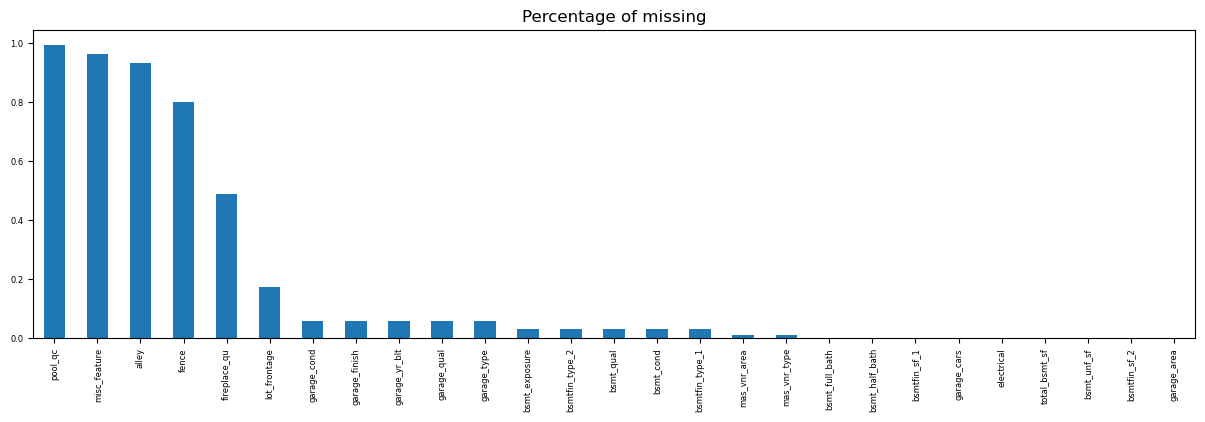

In [10]:
df.isna().mean().sort_values(ascending=False).loc[lambda x: x > 0].plot(kind="bar", figsize=(15, 4), title="Percentage of missing", fontsize=6);

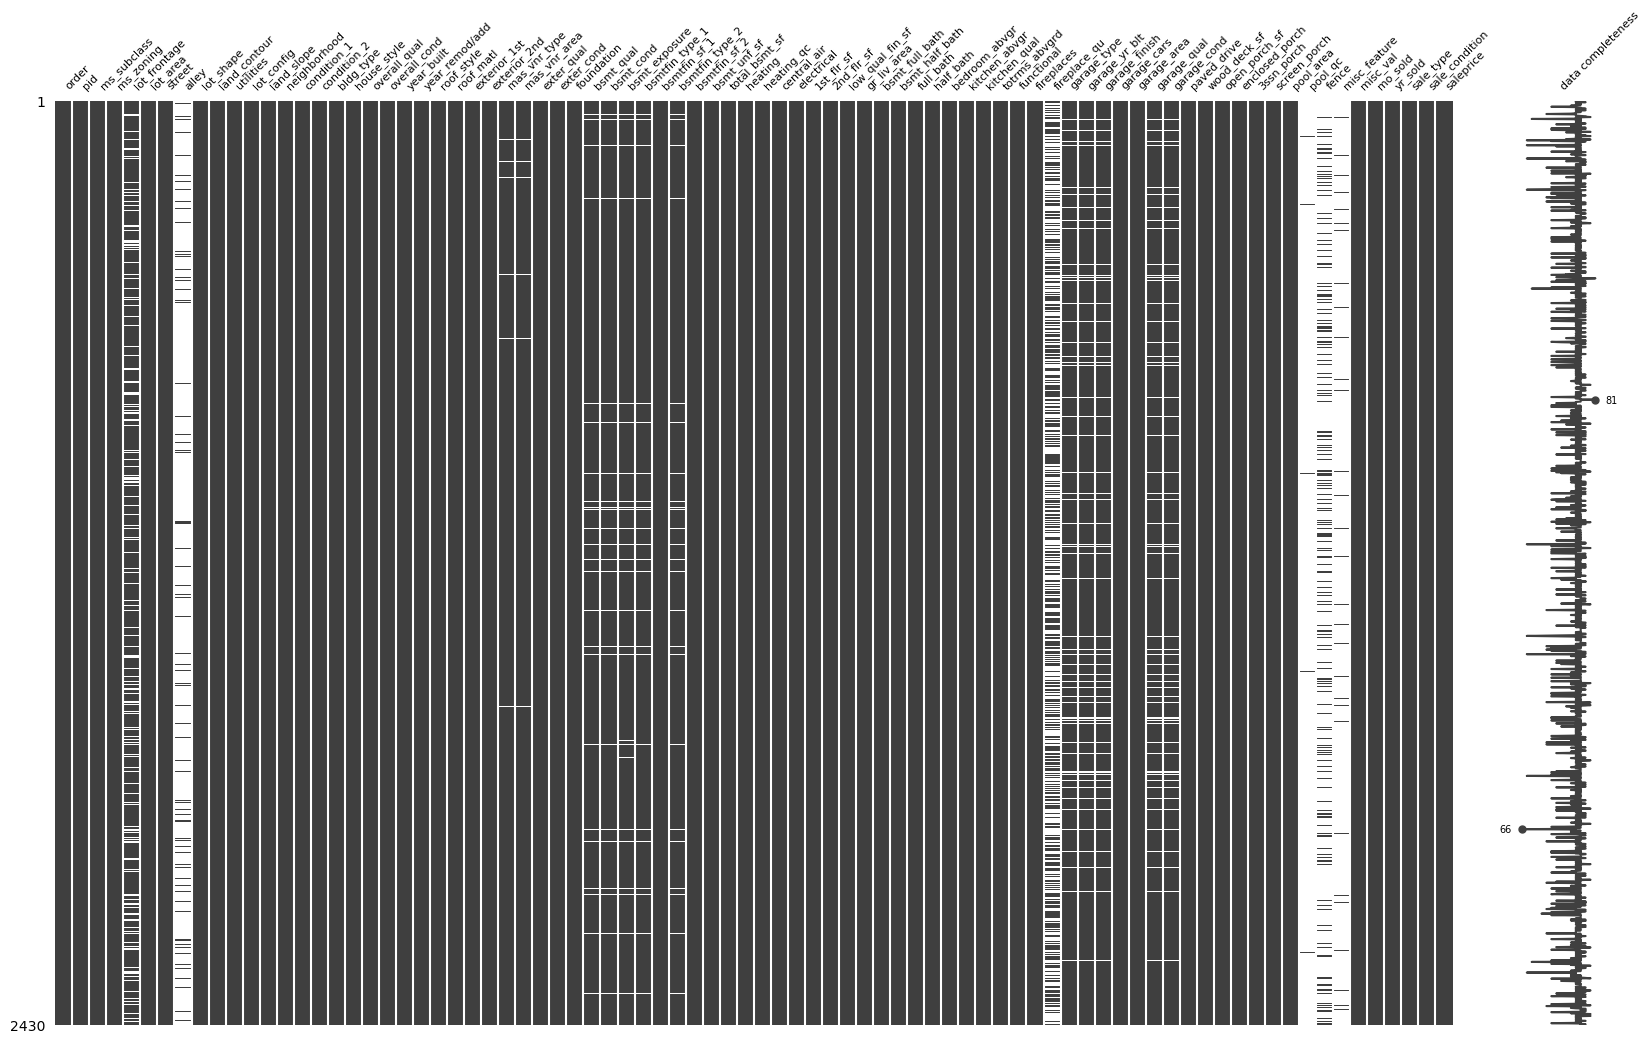

In [11]:
# The missingno library to helps us to visualize where the missing are located in the whole data frame
import missingno as msno
msno.matrix(df, labels=True, fontsize=8, figsize=(20,12));

The two previous charts provide visualizations of the missing values in the dataset. They reveal valuable insights regarding the presence of missing values in different columns.

From the charts, it is evident that certain columns have a significant number of missing values, exceeding 50% of the total values. These columns include "pool_qc," "misc_feature," "alley," and "fence." To handle these missing values, it is recommended to drop these columns from the dataset since a large proportion of the data is missing.

On the other hand, there are columns with a relatively lower percentage of missing values, less than 20%. For these columns, it may be worthwhile to attempt filling in the missing values using appropriate techniques.

### Number of values in each columns

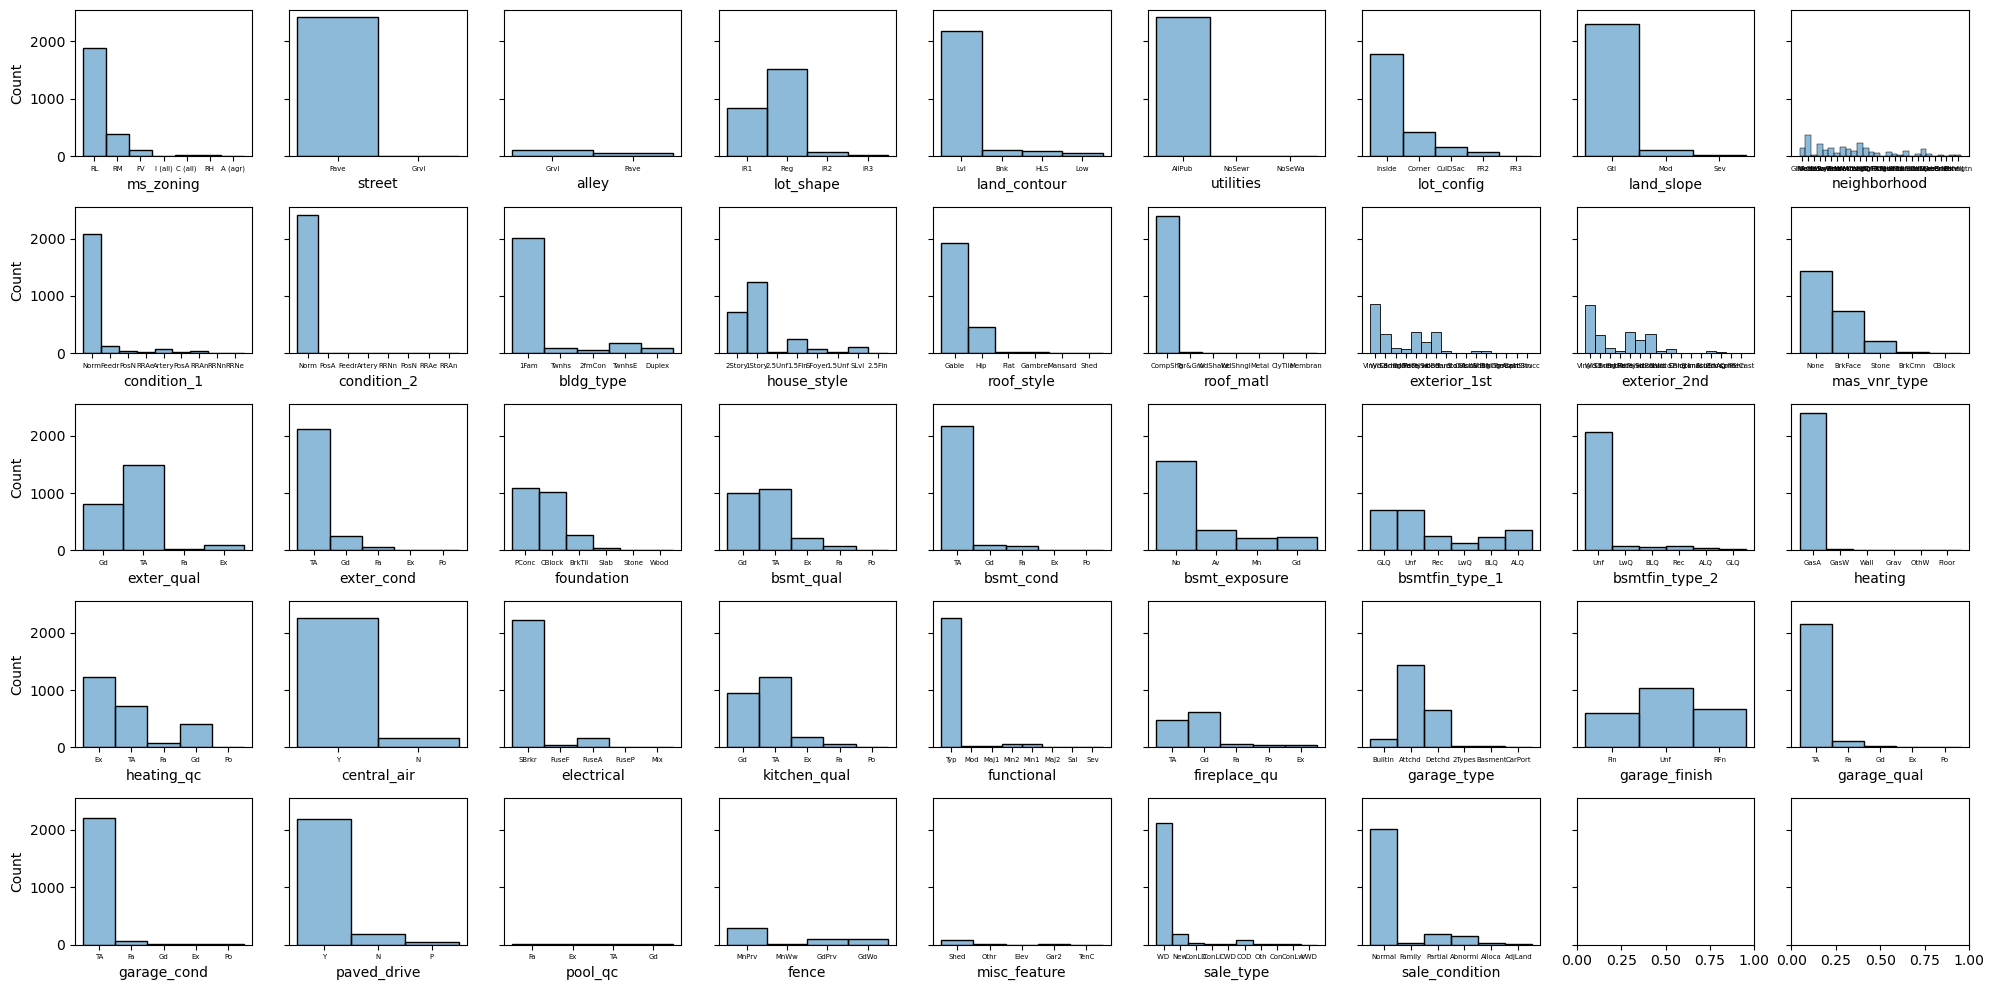

In [12]:
# Create the figure and axes objects for the subplots
fig, axes = plt.subplots(nrows=5, ncols=9, figsize=(20, 10), sharey=True)

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Loop through the columns and plot each one in a separate subplot
for i, col in enumerate(str_cols):
    sns.histplot(data=df, x=col, ax=axes[i], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', labelsize=5)

fig.tight_layout()
plt.show()

The previous graphic provides insights into the number of unique values per column. By analyzing the chart, we can observe certain patterns:
- Columns like 'neighborhood', 'exterior_1st', and 'bsmtfin_type_1' exhibit a wide range of distinct values. These columns display a homogeneous distribution, suggesting diverse categories within these features.
- In contrast, columns such as 'street', 'alley', and 'utilities' have only two or three distinct values. Additionally, most of the entries within these columns are concentrated in just one category. This indicates a lack of variability and limited diversity within these features.

Overall, these observations highlight the variability and distribution patterns present in the dataset, showcasing both columns with abundant distinct values and columns with limited variation.

## Data cleaning

### Qualitative data

#### Pool QC (and pool area)

In [13]:
# quantity of nan 
df['pool_qc'].isna().sum()

2418

In [14]:
df.loc[df['pool_area'] != 0 , ['pool_area', 'pool_qc']]

pool_area pool_qc
93          648      Fa
102         555      Ex
272         228      Ex
321         144      Ex
786         519      Fa
979         561      TA
1500        480      Gd
1582        512      Ex
2048        576      Gd
2239        444      TA
2274        800      Gd
2406        368      TA

Based on the analysis, it is evident that the 'pool_qc' column is almost empty, with only 12 filled rows. Additionally, there is a direct correlation between the data in the 'pool_qc' and 'pool_area' columns. Therefore, the decision has been made to drop these rows from the dataset.

In [15]:
# drop columns
df = df.drop(['pool_area', 'pool_qc'], axis=1)

#remove column names from the list
str_cols.remove('pool_qc')
int_cols.remove('pool_area')

#df shape
df.shape

(2430, 80)

#### Missing values

Due to the high percentage of missing values (more than 48%), the decision was made to drop the columns 'Misc Feature', 'Alley', 'Fence', and 'Fireplace Quality' from the dataset.

In [16]:
col_to_drop = ['misc_feature', 'alley', 'fence', 'fireplace_qu']

# drop column
df = df.drop(col_to_drop, axis=1)

# remove dropped columns from str_cols list
str_cols = [col for col in str_cols if col not in col_to_drop]

#df shape
df.shape

(2430, 76)

#### Garage

In [17]:
# filter columns containing "garage"
garage_cols = list(df.filter(like='garage').columns)

df[garage_cols].head()

garage_type  garage_yr_blt garage_finish  garage_cars  garage_area  \
0     BuiltIn         2000.0           Fin          2.0        554.0   
1      Attchd         1951.0           Unf          2.0        400.0   
2      Attchd         1970.0           Unf          1.0        286.0   
3      Attchd         1959.0           RFn          2.0        447.0   
4      Detchd         1960.0           Unf          1.0        308.0   

  garage_qual garage_cond  
0          TA          TA  
1          TA          TA  
2          TA          TA  
3          TA          TA  
4          TA          TA

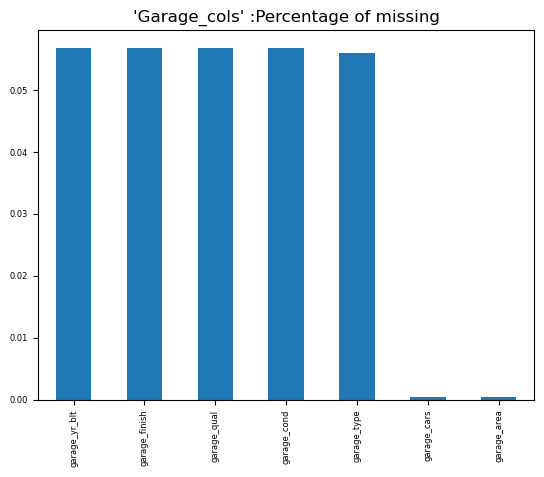

In [18]:
df[garage_cols].isna().mean().sort_values(ascending=False).loc[lambda x: x > 0].plot(kind="bar", title="'Garage_cols' :Percentage of missing", fontsize=6)
plt.show()

To ensure consistency in the garage data, an examination was conducted to verify that when the 'Garage Type' column is filled, all other garage-related columns should also be filled. As a result of this check, two rows were identified where this consistency was not met. Consequently, these two rows will be dropped from the dataset.

In [19]:
df.loc[(df['garage_type'].notna()) & df['garage_qual'].isna(), garage_cols]

garage_type  garage_yr_blt garage_finish  garage_cars  garage_area  \
1114      Detchd            NaN           NaN          1.0        360.0   
1565      Detchd            NaN           NaN          NaN          NaN   

     garage_qual garage_cond  
1114         NaN         NaN  
1565         NaN         NaN

In [20]:
df = df.drop(df[(df['garage_type'].notna()) & (df['garage_qual'].isna())].index)

#df shape
df.shape

(2428, 76)

#### Distinct values per column

In data exploration part, we saw columns such as 'street' and 'utilities' that have only two or three distinct values. Additionally, most of the entries within these columns are concentrated in just one category. This indicates a lack of variability and limited diversity within these features. Let's take a closer look at them.

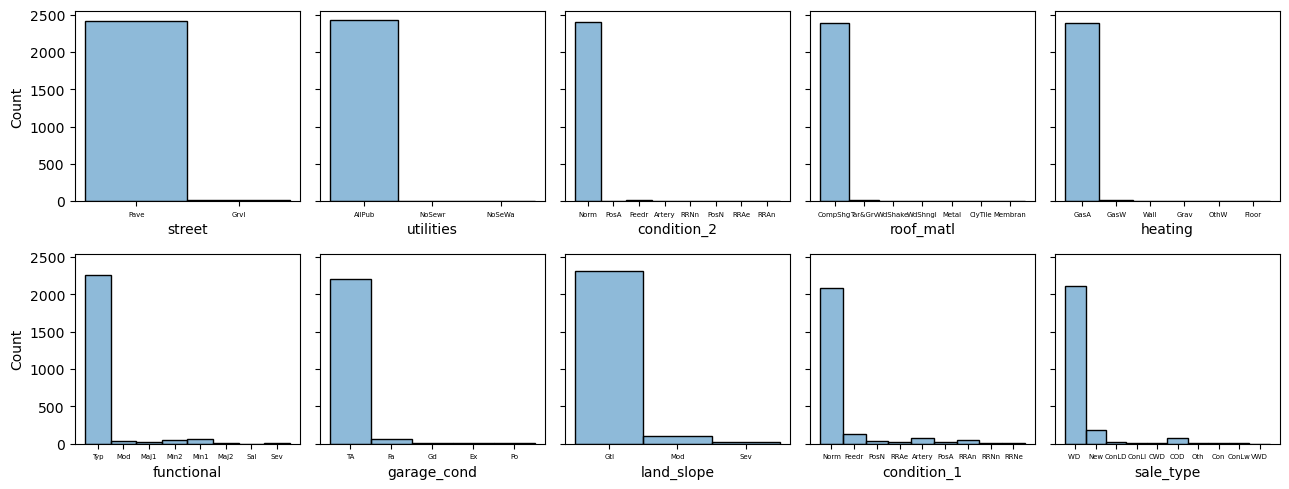

In [21]:
columns_to_plot=['street', 'utilities', 'condition_2', 'roof_matl', 'heating', 'functional', 'garage_cond', 'land_slope', 'condition_1', 'sale_type']

# Create the figure and axes objects for the subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(13, 5), sharey=True)

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Loop through the columns and plot each one in a separate subplot
for i, col in enumerate(columns_to_plot):
    sns.histplot(data=df, x=col, ax=axes[i], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', labelsize=5)

fig.tight_layout()
plt.show()

Based on the previous chart, it is evident that certain columns predominantly contain a single value. As a result, a decision has been made to drop these rows, as they will not significantly impact the prediction of the house price.

In [22]:
# drop columns
df = df.drop(['street', 'utilities', 'condition_2', 'roof_matl', 'heating', 'functional', 'garage_cond', 'land_slope', 'condition_1', 'sale_type'], axis=1)

#df shape
df.shape

(2428, 66)

#### Exterior covering on house

Verify if 'exterior_1st' and 'exterior_2nd' have distinct values.

In [23]:
df.loc[df['exterior_1st'] != df['exterior_2nd'], ['exterior_1st', 'exterior_2nd']]

exterior_1st exterior_2nd
2         CemntBd      CmentBd
18        Wd Sdng      Plywood
35        BrkFace      Wd Sdng
46        Plywood      Wd Sdng
47        HdBoard      Wd Sdng
...           ...          ...
2395      WdShing      Wd Shng
2396       CBlock      VinylSd
2397      BrkFace      Wd Sdng
2400      HdBoard      Plywood
2411      CemntBd      CmentBd

[351 rows x 2 columns]

There are 250 rows in the dataset where the value of the "exteriors_1st" column differs from the value in the "exteriors_2nd" column, accounting for approximately 10% of the data. Since the "exteriors_2nd" column represents the exterior covering on the house when there are multiple materials, and it is predominantly similar to the "exteriors_1st" column, it does not accurately reflect the primary exterior covering used. Therefore, I have decided to drop the "exteriors_2nd" column from the dataset.

In [24]:
# drop column
df = df.drop('exterior_2nd', axis=1)

#remove 'exterior_2nd' from the list str_cols
str_cols.remove('exterior_2nd')

#df shape
df.shape

(2428, 65)

### Quantitative data

#### First look at the data

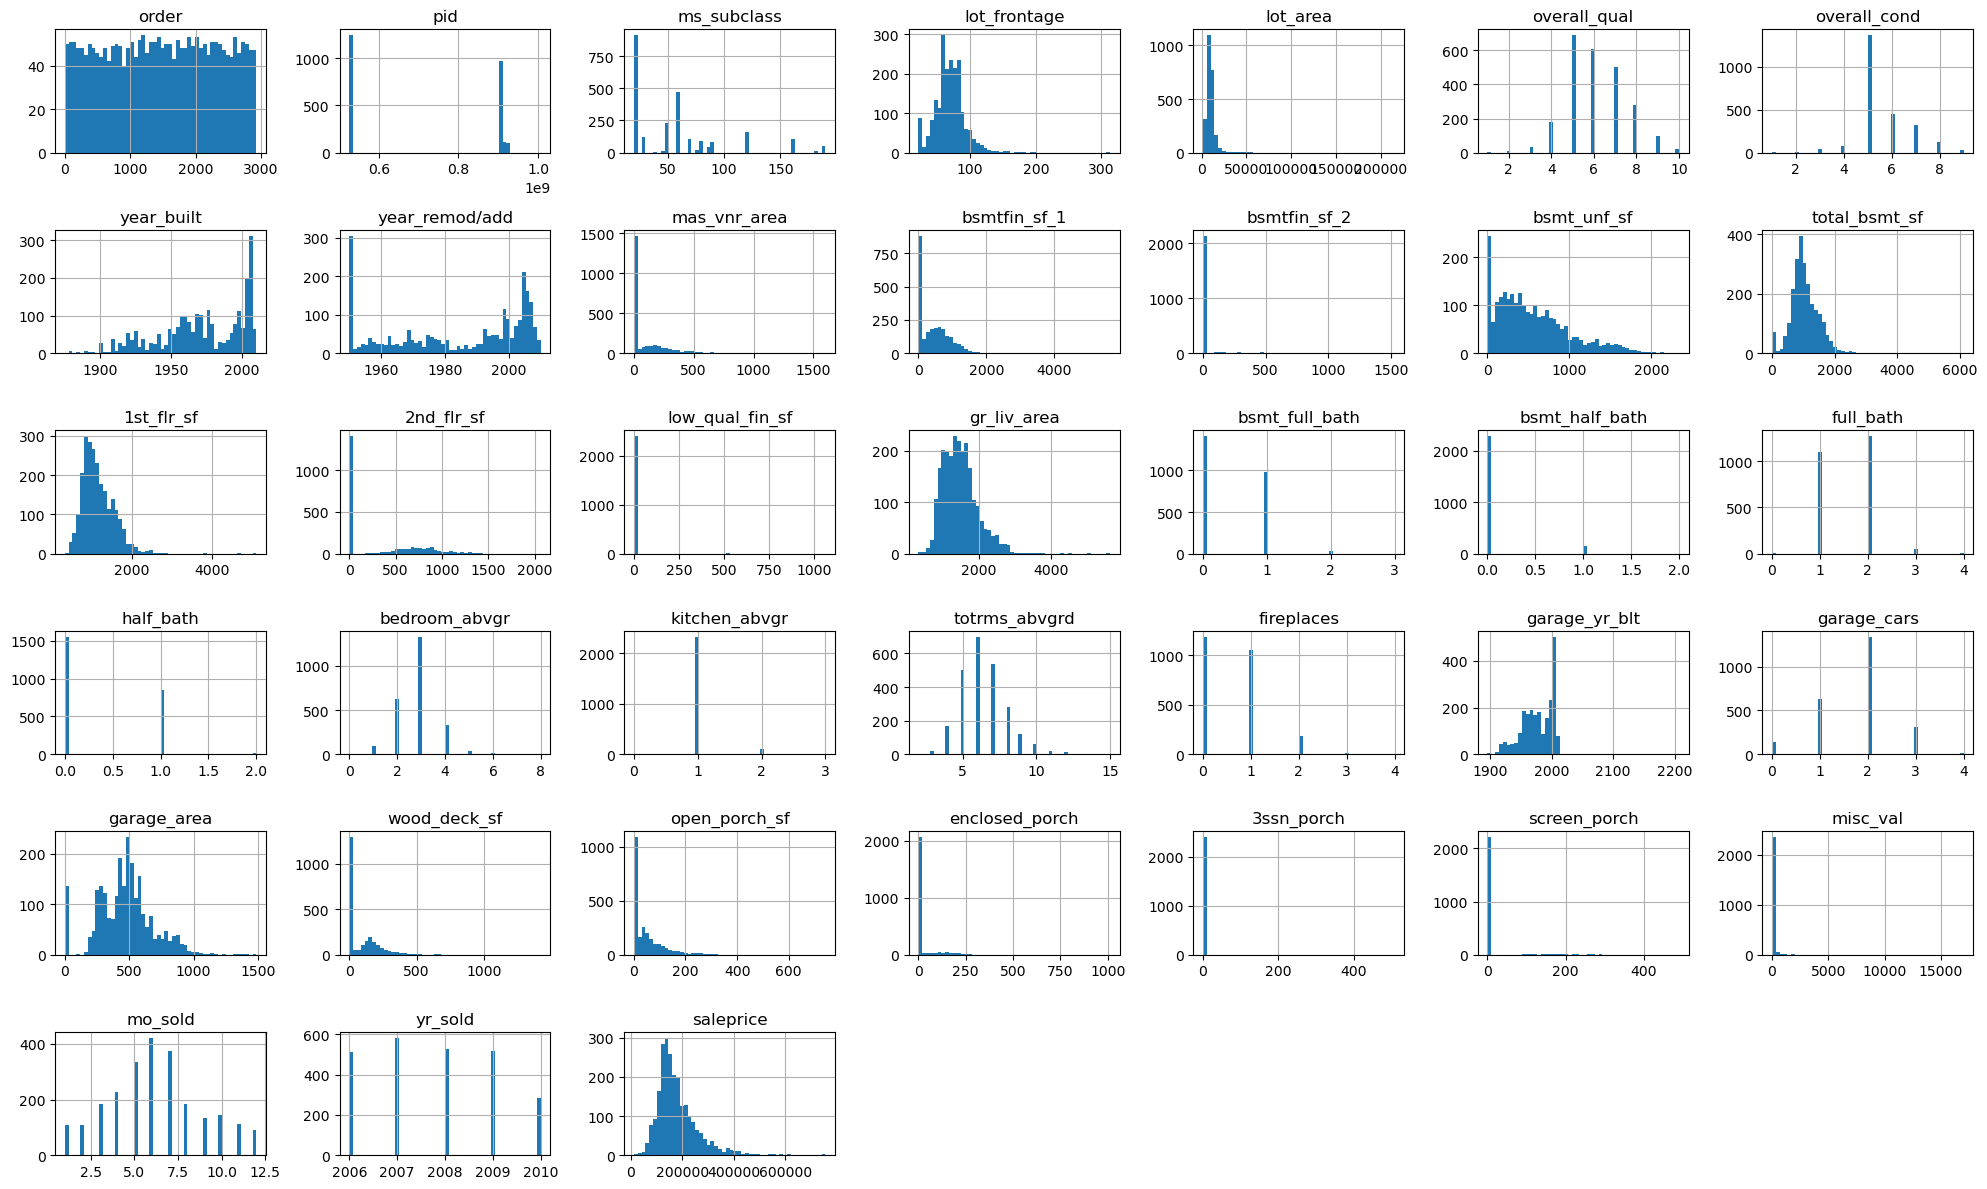

In [25]:
# Plot histograms
df.hist(bins=50, figsize=(20,12), layout=(-1, 7))
plt.tight_layout()
plt.show()

#### identifiers : Order and PID

Columns such as order and PID can be drop because they are identification number and will not affect the sales prices 

In [26]:
#Evaluate the number of duplicated values for order and pid
print("Number of duplicated value for 'order' : ", df.order.nunique() - df.shape[0])
print("Number of duplicated value for 'pid' : ", df.pid.nunique()-df.shape[0])

# drop column
df = df.drop(['order', 'pid'], axis=1)

#df shape
print('\nShape of df :', df.shape)

Number of duplicated value for 'order' :  0
Number of duplicated value for 'pid' :  0

Shape of df : (2428, 63)


#### Lot Frontage (Continuous): Linear feet of street connected to property

This column indicates the presence of properties that are not connected to the street, which appears to be inconsistent. To address this, I have decided to replace these values with the median value.

In [27]:
#Evaluate the number of NaN values
print("Number of NaN value for lot_frontage : ", df[df['lot_frontage'].isna()].shape[0])

df['lot_frontage'].fillna(df['lot_frontage'].median(), inplace=True)

print('\n Column is filled by median value which is :', df['lot_frontage'].median())

Number of NaN value for lot_frontage :  420

 Column is filled by median value which is : 68.0


#### Year Built (Discrete): Original construction date

check if the value is year_remod/add appears after year_built

In [28]:
print("Number of rows where year_remod/add < 'year_built' : ", df[df['year_remod/add'] < df['year_built']].shape[0])

Number of rows where year_remod/add < 'year_built' :  0


No data found. but i noticed that a lot of data where filled in the column 'year_remod/add' with the value 1950 (which is the min). 
when we look at the plot it seems abnormal nevertheless the qty of data (more than 10% of the dataset) is too important to be droped so i decided to filled with the value of 'year_built' when the value of df['year_remod/add'] == 1950

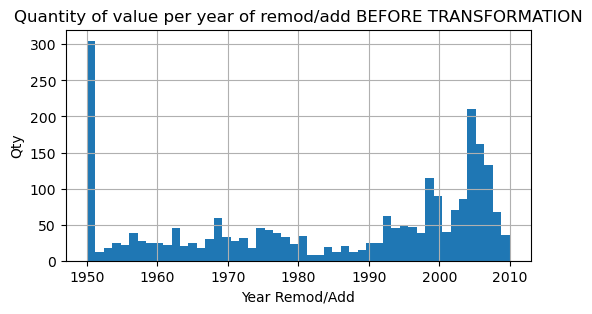

In [29]:
df['year_remod/add'].hist(bins=50, figsize=(6,3))
plt.xlabel("Year Remod/Add")
plt.ylabel("Qty")
plt.title('Quantity of value per year of remod/add BEFORE TRANSFORMATION')
plt.show()

In [30]:
print("Before transformation, number of rows where 'year_remod/add' is egale to 1950 : ", df[df['year_remod/add'] == 1950].shape[0])

Before transformation, number of rows where 'year_remod/add' is egale to 1950 :  294


In [31]:
# fill the value of column 'year_remod/add' with the value of column 'year_built' where value 1950 appears in column 'year_remod/add'
df.loc[df['year_remod/add'] == 1950, 'year_remod/add'] = df.loc[df['year_remod/add'] == 1950, 'year_built']

In [32]:
print("After transformation, number of rows where 'year_remod/add' is egale to 1950 : ", df[df['year_remod/add'] == 1950].shape[0])

After transformation, number of rows where 'year_remod/add' is egale to 1950 :  16


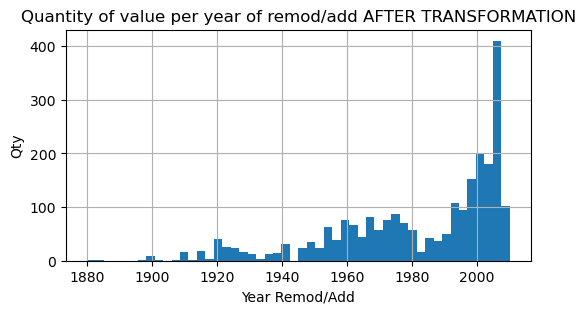

In [33]:
df['year_remod/add'].hist(bins=50, figsize=(6,3))
plt.xlabel("Year Remod/Add")
plt.ylabel("Qty")
plt.title('Quantity of value per year of remod/add AFTER TRANSFORMATION')
plt.show()

#### Mas Vnr Area (Continuous): Masonry veneer area in square feet

In [34]:
print('Number of NaN :', df[df.mas_vnr_area.isna()].shape[0])

# drop rows
df = df.dropna(subset=['mas_vnr_area'], axis=0)

#df shape
print('\nShape of df :', df.shape)

Number of NaN : 20

Shape of df : (2408, 63)


Since it represents a small portion of the data, I have decided to remove these 20 rows.

#### Total Bsmt SF (Continuous): Total square feet of basement area

In [35]:
print('Number of NaN :', df[df.total_bsmt_sf.isna()].shape[0])

# drop rows
df = df.dropna(subset=['total_bsmt_sf'], axis=0)

#df shape
print('\nShape of df :', df.shape)

Number of NaN : 1

Shape of df : (2407, 63)


Let's check if, when the value of 'total_bsmt_sf' is 0, all other columns containing "bsmt" also have a value of 0. If no discrepancies are found, it means there are no gaps in the data.

In [36]:
df.loc[df['total_bsmt_sf']==0, ['total_bsmt_sf','bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf']].sum()

total_bsmt_sf    0.0
bsmtfin_sf_1     0.0
bsmtfin_sf_2     0.0
bsmt_unf_sf      0.0
dtype: float64

#### Garage Yr Blt (Discrete): Year garage was built

In [37]:
print('Maximum date for garage_yr_blt :', df.garage_yr_blt.max())

Maximum date for garage_yr_blt : 2010.0


OK No inconsistency found

I also want to verify if the values in the "garage_yr_blt" column are consistently older than or equal to the corresponding values in the "year_built" column. If this condition is not met, it suggests that the garage was built before the house, which is likely an error.

In [38]:
print("Number of rows where 'garage_yr_blt' < 'year_built' : ", df[df['garage_yr_blt'] < df['year_built']].shape[0])

Number of rows where 'garage_yr_blt' < 'year_built' :  16


In [39]:
# Replace the values in the 'garage_yr_blt' column with the corresponding 'year_built' 
# value whenever 'garage_yr_blt' is less than 'year_built' 
df.loc[df['garage_yr_blt'] < df['year_built'], 'garage_yr_blt'] = df['year_built']

I have observed 135 rows in which the "garage_yr_blt" column is filled with "np.nan" values. To prevent having NaN values in my DataFrame, I intend to replace these values. It is worth noting that the NaN values in this column indicate the absence of a garage.

Since we still have information available in the "garage_area" and "garage_cars" columns, where both values are equal to 0 when there is no garage, I have decided to remove these rows from the DataFrame.

In [40]:
df['garage_yr_blt'].isna().sum()

135

In [41]:
df.loc[df['garage_yr_blt'].isna(), ['garage_yr_blt','garage_area', 'garage_cars']]

garage_yr_blt  garage_area  garage_cars
16              NaN          0.0          0.0
48              NaN          0.0          0.0
62              NaN          0.0          0.0
73              NaN          0.0          0.0
76              NaN          0.0          0.0
...             ...          ...          ...
2292            NaN          0.0          0.0
2308            NaN          0.0          0.0
2314            NaN          0.0          0.0
2354            NaN          0.0          0.0
2425            NaN          0.0          0.0

[135 rows x 3 columns]

In [42]:
# drop column
df = df.drop('garage_yr_blt', axis=1)

#df shape
print('\nShape of df :', df.shape)


Shape of df : (2407, 62)


#### Garage Area (Continuous): Size of garage in square feet

check if garage area ==0 all the other columns that cotains "garage"=0 as well

In [43]:
df.loc[df['garage_area']==0, ['garage_area','garage_cars']].sum()

garage_area    0.0
garage_cars    0.0
dtype: float64

ok no gaps found

#### (to delete?!) Columns filled with zero instead of none

#### (to delete ?!)Rooms

check if the sum of all rooms is egale to the total room

#### Columns filled mostly with zero

In [44]:
#compute the qty of zero value in every columns:
qty_zero_values = df.eq(0).sum().sort_values(ascending = False) #count the number 0
percent_zero_values = (qty_zero_values/df.shape[0])*100 
df_zero_values = pd.concat([qty_zero_values, percent_zero_values.round(1)], axis=1, keys=['qty_zero_values', 'percent_zero_values'])
df_zero_values[df_zero_values['percent_zero_values']>0].head(15)

qty_zero_values  percent_zero_values
3ssn_porch                  2378                 98.8
low_qual_fin_sf             2377                 98.8
misc_val                    2320                 96.4
bsmt_half_bath              2263                 94.0
screen_porch                2189                 90.9
bsmtfin_sf_2                2114                 87.8
enclosed_porch              2035                 84.5
half_bath                   1543                 64.1
mas_vnr_area                1435                 59.6
bsmt_full_bath              1398                 58.1
2nd_flr_sf                  1394                 57.9
wood_deck_sf                1259                 52.3
fireplaces                  1174                 48.8
open_porch_sf               1071                 44.5
bsmtfin_sf_1                 763                 31.7

We can notice that columns are filled mostly with zero value and will not influence correlation. I decide to drop all columns that have more than 80% of zero values

In [45]:
# mask which has 'True' when 'percent_null_values' is greater than 95
entries_to_drop = df_zero_values[df_zero_values['percent_zero_values'].gt(80)]
entries_to_drop = entries_to_drop.index.tolist()

# Dropping these entries by selecting the samples that should be dropped
df = df.drop(entries_to_drop, axis=1)

df.shape #shape of remaining data

(2407, 55)

#### Living Area

Check if the sum of 1st and 2nd floor is egale to the ground surface area.

In [46]:
print("Number of rows where 'gr_liv_area' != '1st_flr_sf' + '2nd_flr_sf' : ", df[df['gr_liv_area'] != df['1st_flr_sf'] + df['2nd_flr_sf']].shape[0])

Number of rows where 'gr_liv_area' != '1st_flr_sf' + '2nd_flr_sf' :  30


In [47]:
# drop rows where 1st + 2nd floor surface is different from ground surface area
df = df.drop(df[df['gr_liv_area'] != df['1st_flr_sf'] + df['2nd_flr_sf']].index)

#df shape
print('\nShape of df :', df.shape)


Shape of df : (2377, 55)


because these three features are correlated, i decided to drop '2nd_flr_sf' from the dataframe.

In [48]:
df = df.drop('2nd_flr_sf', axis=1)
#df shape
print('\nShape of df :', df.shape)


Shape of df : (2377, 54)


#### !!!!!!!Basement surface

check if the sum of basement unfinished and finished surface is egale to the basement surface area

In [49]:
# Replace NaN with 0
df_filled = df.fillna(0)

df[df_filled['total_bsmt_sf'] != df_filled['bsmtfin_sf_1']+ df_filled['bsmt_unf_sf']]

print("Number of rows where 'total_bsmt_sf' != 'bsmtfin_sf_1' + 'bsmt_unf_sf' : ", df_filled[df_filled['total_bsmt_sf'] != df_filled['bsmtfin_sf_1']+ df_filled['bsmt_unf_sf']].shape[0])

Number of rows where 'total_bsmt_sf' != 'bsmtfin_sf_1' + 'bsmt_unf_sf' :  290


In [50]:
# drop rows where finished + unfinishes basement surface is different from total basement surface area
df = df.drop(df_filled[df_filled['total_bsmt_sf'] != df_filled['bsmtfin_sf_1']+ df_filled['bsmt_unf_sf']].index)

#df shape
print('\nShape of df :', df.shape)


Shape of df : (2087, 54)


because these three features are correlated, i decided to drop 'bsmtfin_sf_1' from the dataframe.

In [51]:
df = df.drop('bsmtfin_sf_1', axis=1)
#df shape
print('\nShape of df :', df.shape)


Shape of df : (2087, 53)


#### bsmt_full_bath

In [52]:
print("Number of nan values in 'bsmt_full_bath'", df['bsmt_full_bath'].isna().sum())

# Replace the NaN values in a column with the most frequently occurring value
df['bsmt_full_bath'].fillna(df['bsmt_full_bath'].mode().iloc[0], inplace=True)

Number of nan values in 'bsmt_full_bath' 1


#### NaN Values

In [53]:
# Count the number of NaN values in each column
nan_counts = df.select_dtypes(include='number').isna().sum()

# Take the top 5 values
#top_10_nan_counts = 
nan_counts.sort_values(ascending=False)[:5]

ms_subclass      0
lot_frontage     0
yr_sold          0
mo_sold          0
open_porch_sf    0
dtype: int64

There are no NaN values present in the 'number' columns.

### Outliers removal

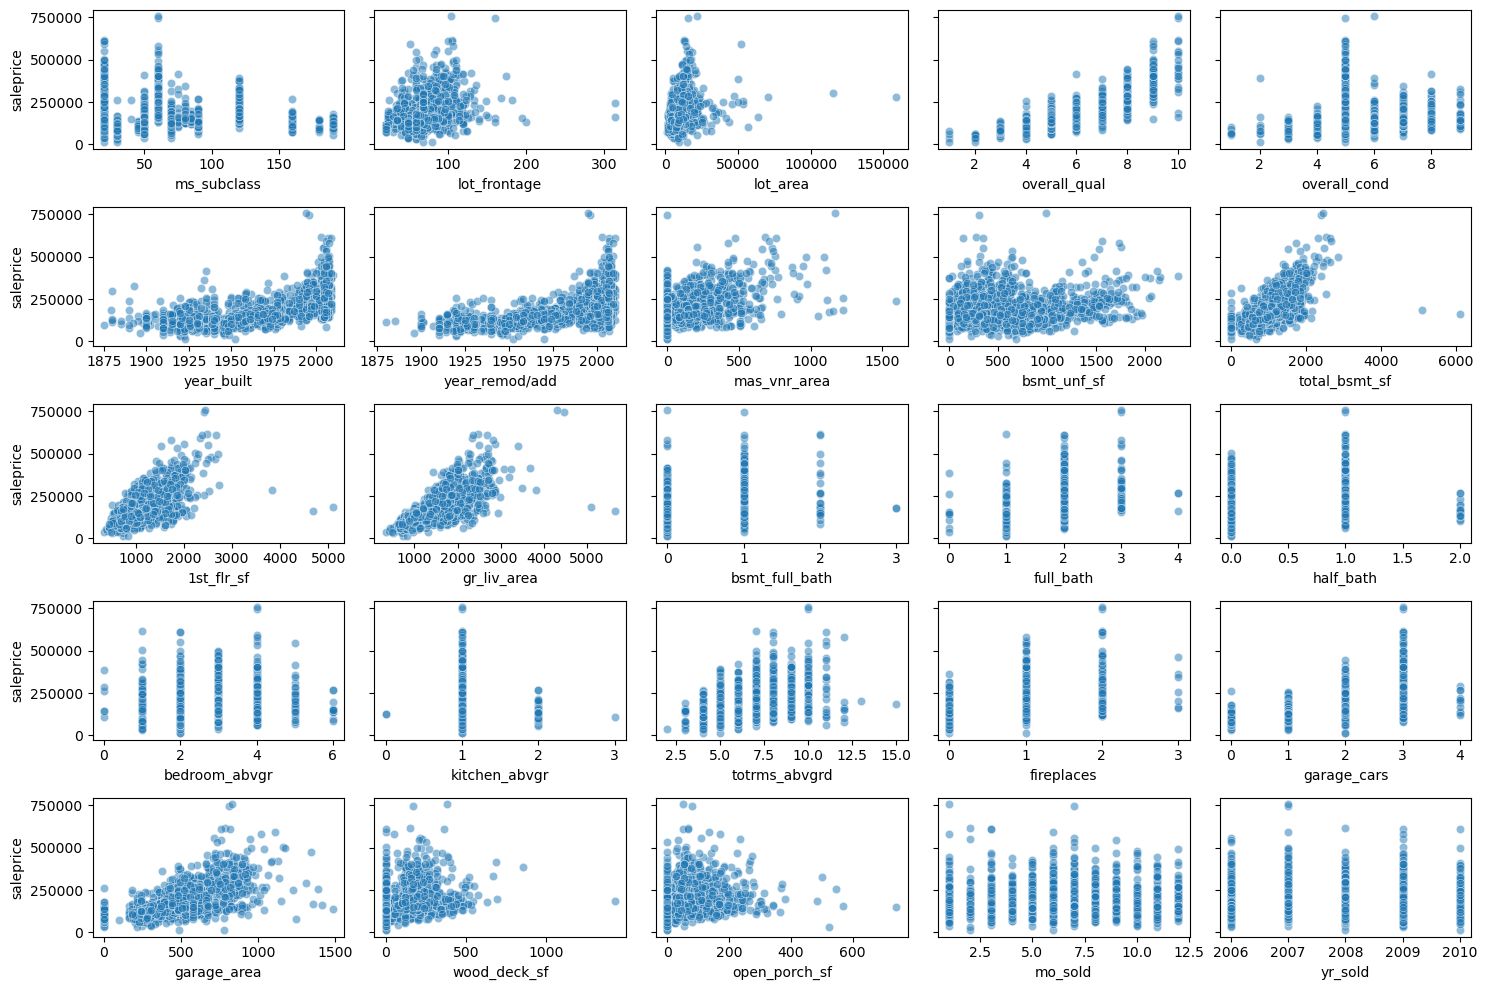

In [54]:
# Define the columns to plot
columns_to_plot = df.select_dtypes(include="number").columns.tolist()
columns_to_plot.remove('saleprice')

# Create the figure and axes objects for the subplots
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize=(15, 10), sharey=True)

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Loop through the columns and plot each one in a separate subplot
for i, col in enumerate(columns_to_plot):
    sns.scatterplot(data=df, 
                    x=col, 
                    y="saleprice", 
                    ax=axes[i], 
                    alpha=0.5
               )
    axes[i].set_ylabel('saleprice')
    axes[i].set_xlabel(col)
#axes[i].set_title('salesprice vs. '+col)

fig.tight_layout()
plt.show()

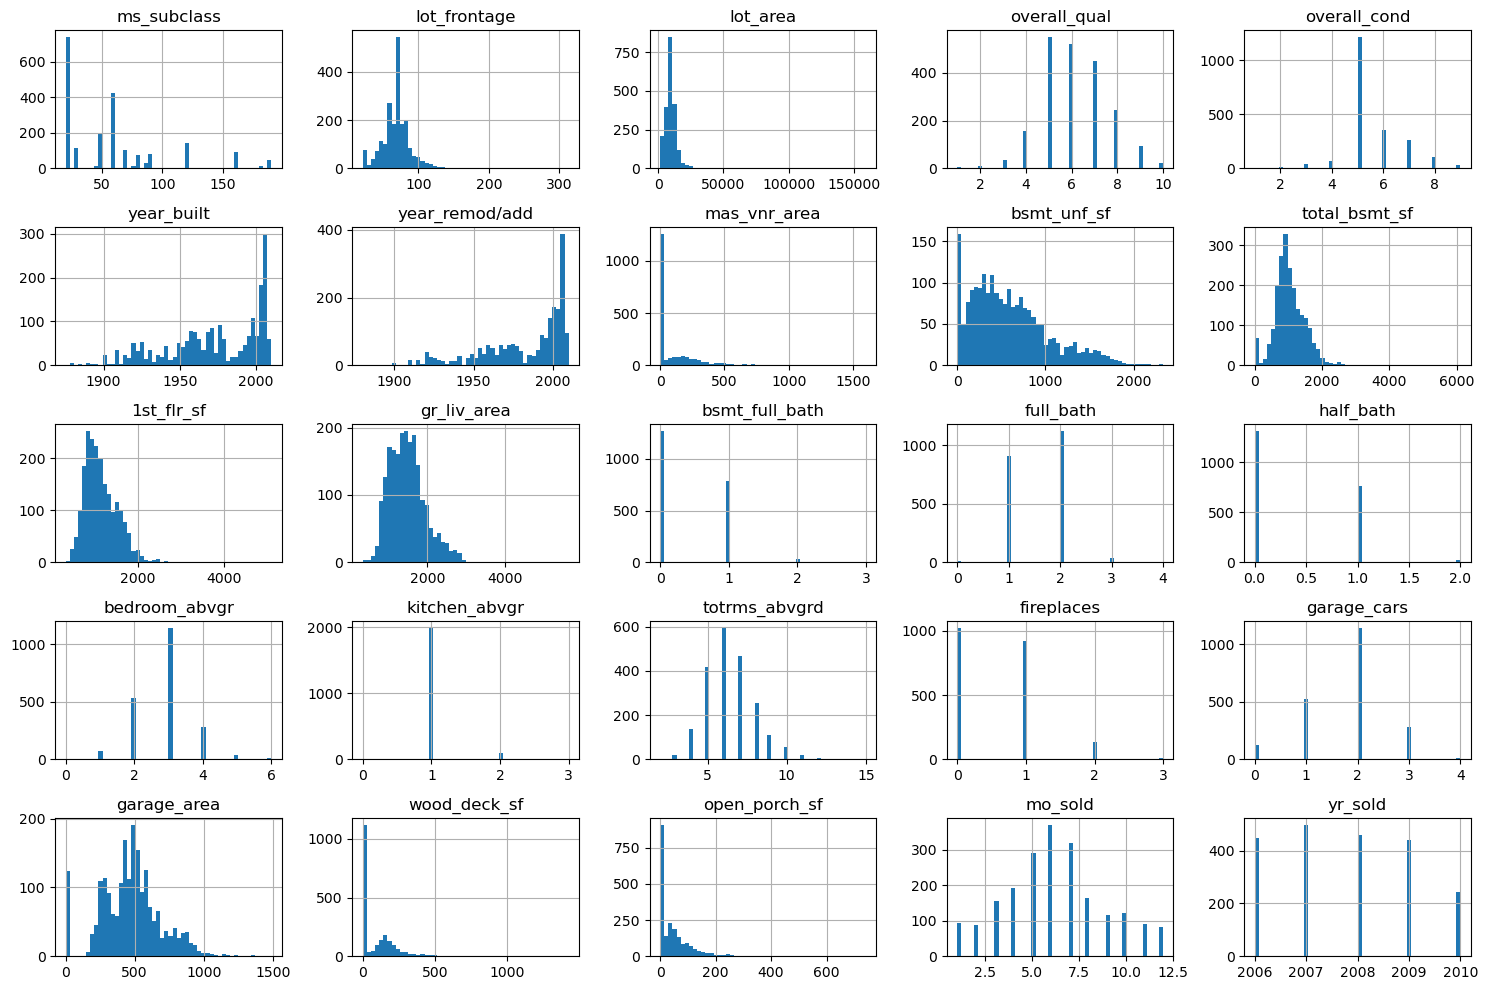

In [55]:
df[columns_to_plot].hist(bins=50, figsize=(15,10), layout=(-1, 5))
plt.tight_layout()
plt.show()

#### Manual removal outliers

In [56]:
# function drop_entries that takes the DataFrame (df), column name (column), and threshold value (threshold) as inputs. 
# It performs the filtering, counts the dropped entries, updates the DataFrame, and returns the modified DataFrame and the count of dropped entries.

def drop_entries(df, column, lower_threshold, upper_threshold):
    filter = df[column].gt(upper_threshold) | df[column].lt(lower_threshold)
    dropped_entries = filter.sum()
    df = df[~filter]
    return df, dropped_entries

In [57]:
df, dropped_lot_area = drop_entries(df, "lot_area", 0, 15000)
print("Number of entries dropped in 'lot_area':", dropped_lot_area)

df, dropped_mas_vnr_area = drop_entries(df, "mas_vnr_area", 0, 750)
print("Number of entries dropped in 'mas_vnr_area':", dropped_mas_vnr_area)

df, dropped_wood_deck_sf = drop_entries(df, "wood_deck_sf", 0, 600)
print("Number of entries dropped in 'wood_deck_sf':", dropped_wood_deck_sf)

df, dropped_gr_liv_area = drop_entries(df, "gr_liv_area", 0, 3000)
print("Number of entries dropped in 'gr_liv_area':", dropped_gr_liv_area)

df, dropped_garage_area = drop_entries(df, "garage_area", 0, 900)
print("Number of entries dropped in 'garage_area':", dropped_garage_area)

df, dropped_open_porch_sf = drop_entries(df, "open_porch_sf", 0, 300)
print("Number of entries dropped in 'open_porch_sf':", dropped_open_porch_sf)

df, dropped_kitchen_abvgr = drop_entries(df, "kitchen_abvgr", 1, 2)
print("Number of entries dropped in 'kitchen_abvgr':", dropped_kitchen_abvgr)

Number of entries dropped in 'lot_area': 166
Number of entries dropped in 'mas_vnr_area': 15
Number of entries dropped in 'wood_deck_sf': 1
Number of entries dropped in 'gr_liv_area': 3
Number of entries dropped in 'garage_area': 46
Number of entries dropped in 'open_porch_sf': 13
Number of entries dropped in 'kitchen_abvgr': 3


In [58]:
#df shape
print('\nShape of df :', df.shape)


Shape of df : (1840, 53)


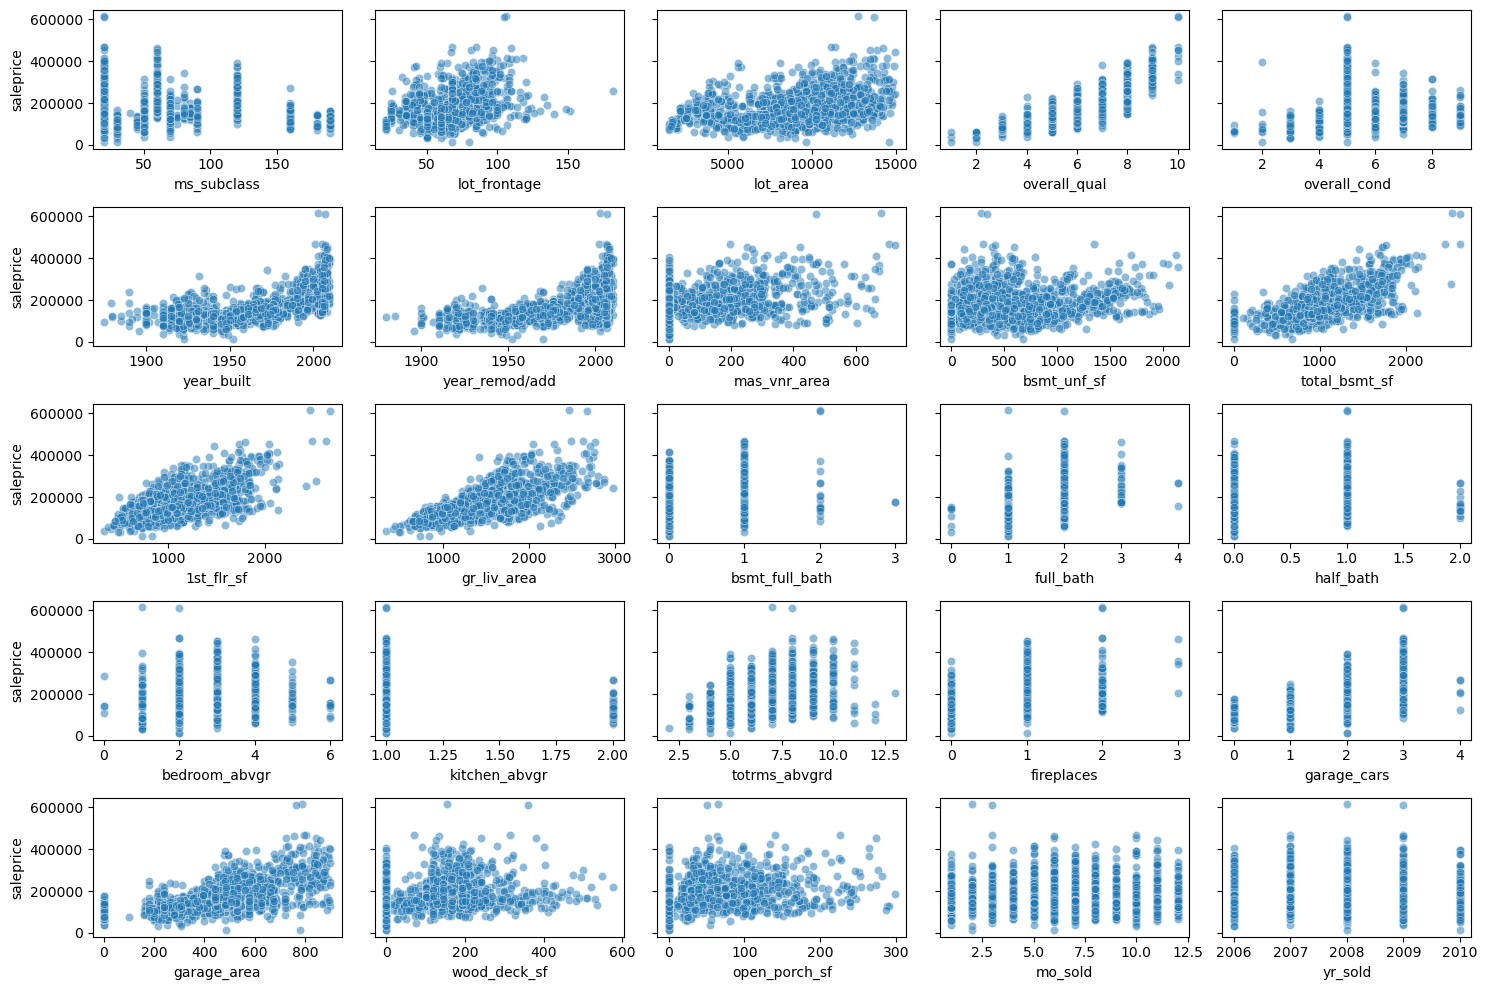

In [59]:
# Define the columns to plot
columns_to_plot = df.select_dtypes(include="number").columns.tolist()
columns_to_plot.remove('saleprice')

# Create the figure and axes objects for the subplots
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize=(15, 10), sharey=True)

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Loop through the columns and plot each one in a separate subplot
for i, col in enumerate(columns_to_plot):
    sns.scatterplot(data=df, 
                    x=col, 
                    y="saleprice", 
                    ax=axes[i], 
                    alpha=0.5
               )
    axes[i].set_ylabel('saleprice')
    axes[i].set_xlabel(col)
#axes[i].set_title('salesprice vs. '+col)

fig.tight_layout()
plt.show()

## Feature engineering

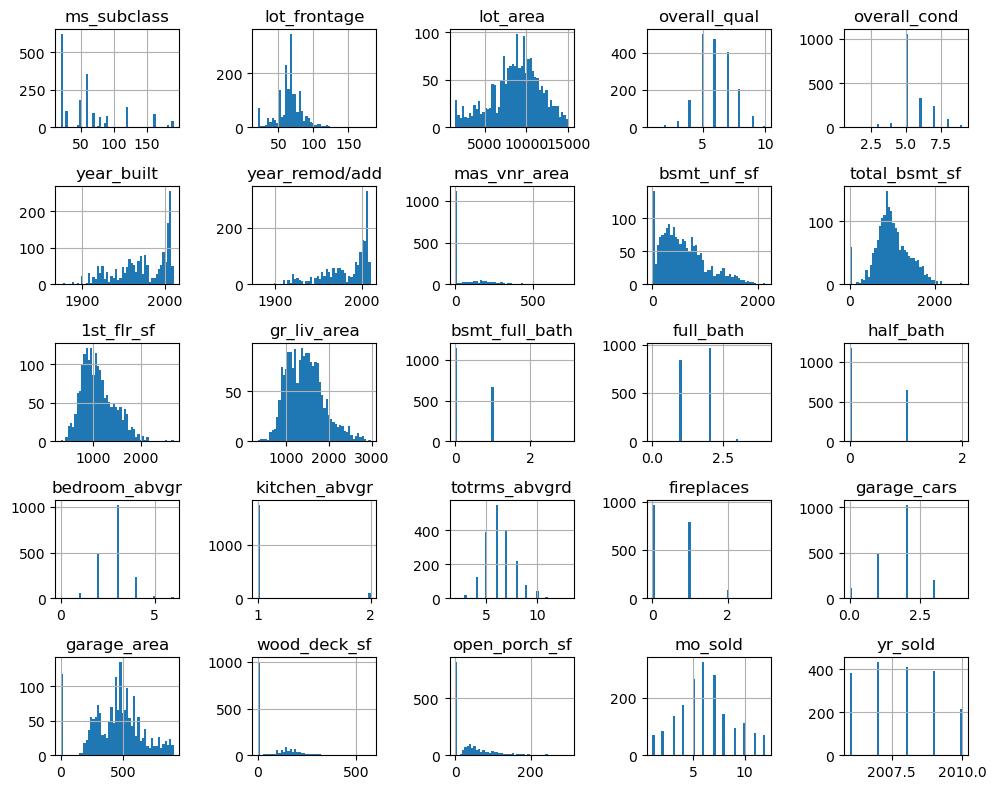

In [60]:
df[columns_to_plot].hist(bins=50, figsize=(10,8), layout=(-1, 5))
plt.tight_layout()
plt.show()

### Sale Prices

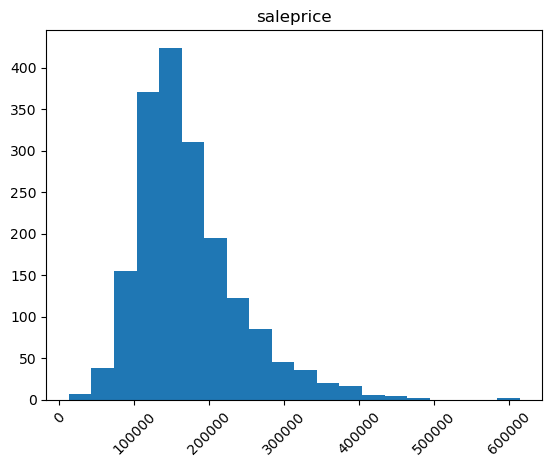

In [61]:
df.hist(column="saleprice", bins=20, grid=False, xrot=45)
plt.show()

To avoid building a model that is biased toward more expensive houses, we will apply the logarithm transformation and build a model that predicts the log of the sale price.

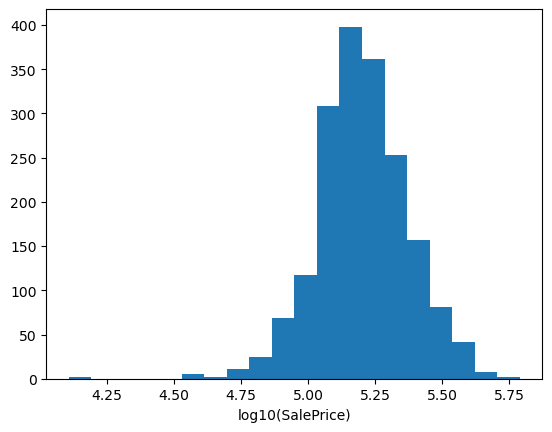

In [62]:
plt.hist(np.log10(df.saleprice), bins=20)
plt.xlabel("log10(SalePrice)")
plt.show()

In [63]:
df['saleprice_log'] = np.log10(df.saleprice)

In [64]:
# drop column
df = df.drop('saleprice', axis=1)

#df shape
df.shape

(1840, 53)

### Log1p transformation

I have chosen not to activate these lines of code as applying the np.log1p transformation to my data led to worse predictions, especially for my complex model.

### Overall Quality and condition

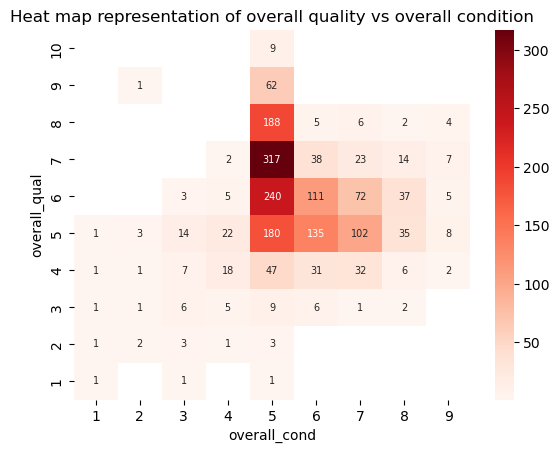

In [65]:
# Create a pivot table to count the number of items between overall quality and overall condition notation
table = df.pivot_table(index=df.overall_qual, columns=df.overall_cond, aggfunc='size') #, fill_value=0

# Draw the heatmap
sns.heatmap(table, cmap='Reds', annot=True, annot_kws={"fontsize": 7}, fmt=".0f")
plt.title("Heat map representation of overall quality vs overall condition")
plt.gca().invert_yaxis()
plt.show()

In [66]:
# Creat a new column which use both quality and condition:
df['overall_qual_cond'] = df['overall_qual'] * df['overall_cond']

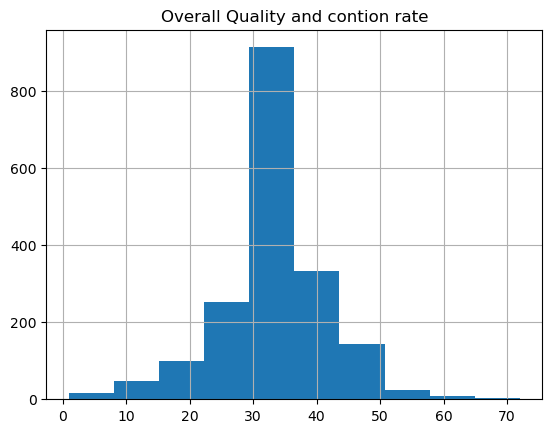

In [67]:
df['overall_qual_cond'].hist()
plt.title('Overall Quality and contion rate')
plt.show()

### Garage

In [68]:
# Get the list of columns containing "garage"
garage_columns = df.filter(like='garage').columns.tolist()
df[garage_columns].head()

garage_type garage_finish  garage_cars  garage_area garage_qual
0     BuiltIn           Fin          2.0        554.0          TA
1      Attchd           Unf          2.0        400.0          TA
2      Attchd           Unf          1.0        286.0          TA
3      Attchd           RFn          2.0        447.0          TA
4      Detchd           Unf          1.0        308.0          TA

Manual mapping of garage_finish and garage qual

In [69]:
scale_mapper = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'nan':0}
#replace np.nan values by "nan" in order to have only strings
df['garage_qual'] = df.garage_qual.fillna("nan")
df["garage_qual"] = df.garage_qual.replace(scale_mapper)

In [70]:
scale_mapper = {'Fin':3, 'RFn':2, 'Unf':1, 'nan':0}
#replace np.nan values by "nan" in order to have only strings
df['garage_finish'] = df.garage_finish.fillna("nan")
df["garage_finish"] = df.garage_finish.replace(scale_mapper)

In [71]:
df[garage_columns].head()

garage_type  garage_finish  garage_cars  garage_area  garage_qual
0     BuiltIn              3          2.0        554.0            3
1      Attchd              1          2.0        400.0            3
2      Attchd              1          1.0        286.0            3
3      Attchd              2          2.0        447.0            3
4      Detchd              1          1.0        308.0            3

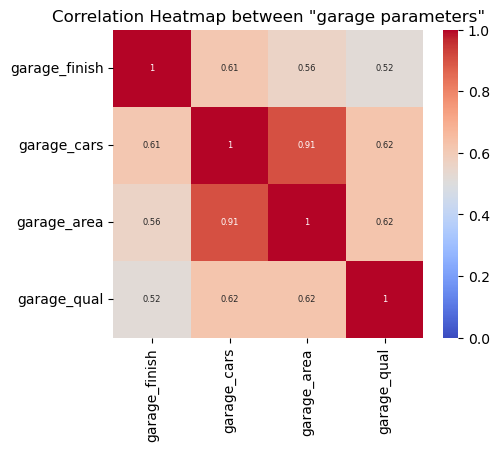

In [72]:
# Calculate the correlation matrix
correlation_matrix = df[garage_columns].corr()

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6}, vmin=0, vmax=1)
plt.title('Correlation Heatmap between "garage parameters"')
plt.show()

The Heatmap reveals strong correlations among all the parameters, ranging from 0.52 between garage_finish and garage_qual, to 0.91 between garage_cars and garage_area. Considering these findings, I have made the decision to create a unified parameter by combining all four.

In [73]:
# Creat a new column which use both quality and condition:
df['garage_unified_param'] = df['garage_qual'] * df['garage_finish'] * df['garage_cars'] * df['garage_area']

In [74]:
# Replace nan by 0
df['garage_unified_param'] = df['garage_unified_param'].fillna(0)

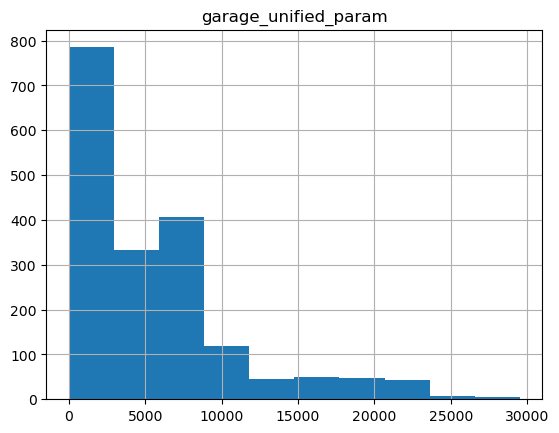

In [75]:
df['garage_unified_param'].hist()
plt.title('garage_unified_param')
plt.show()

In [76]:
# drop column
df = df.drop(['garage_qual', 'garage_finish', 'garage_cars', 'garage_area'], axis=1)

#df shape
df.shape

(1840, 51)

## Feature encoding

#### Ordinal variable

In [77]:
ordinal_var = ['lot_shape', 'overall_qual', 'overall_cond', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 
               'bsmtfin_type_1', 'bsmtfin_type_2', 'electrical', 'paved_drive', 'heating_qc', 'kitchen_qual']

In [78]:
# create a second list of ordinal but without integer because they are already "encoded"
ordinal_var_str = df[ordinal_var].select_dtypes(exclude='number').columns.tolist()

In [79]:
df[ordinal_var_str].head()

lot_shape exter_qual exter_cond bsmt_qual bsmt_cond bsmt_exposure  \
0       IR1         Gd         TA        Gd        TA            No   
1       Reg         TA         TA        TA        TA            No   
2       Reg         TA         TA        TA        TA            No   
3       IR1         TA         TA        TA        TA            No   
4       IR1         Fa         TA        TA        TA            No   

  bsmtfin_type_1 bsmtfin_type_2 electrical paved_drive heating_qc kitchen_qual  
0            GLQ            Unf      SBrkr           Y         Ex           Gd  
1            Unf            Unf      SBrkr           Y         TA           Gd  
2            Unf            Unf      SBrkr           Y         Fa           TA  
3            Rec            Unf      SBrkr           Y         Gd           Gd  
4            Unf            Unf      FuseF           N         TA           TA

In [80]:
#replace np.nan values by "nan" in order to have only strings
df[ordinal_var_str] = df[ordinal_var_str].fillna("nan")

In [81]:
df[ordinal_var_str] = df[ordinal_var_str].replace(0, "nan")

I decided to use OdrinalEncoder from sklearn.preprocessing and use the option "categories" to keep an order "best to worst" with numbers 

In [82]:
oe = OrdinalEncoder(categories=[
                    ['Reg', 'IR1', 'IR2', 'IR3'],  #lot_shape
                    ['Ex', 'Gd', 'TA', 'Fa', 'Po'], #exter_qual
                    ['Ex', 'Gd', 'TA', 'Fa', 'Po'], #exter_cond
                    ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'nan'], #bsmt_qual
                    ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'nan'], #bsmt_cond
                    ['Gd', 'Av', 'Mn', 'No', 'nan'], #bsmt_exposure
                    ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'nan'], #bsmt_fin_type_1
                    ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'nan'], #bsmt_fin_type_2
                    ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix', 'nan'], #electrical
                    ['Y', 'P', 'N'], #paved_drive
                    ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'nan'], #heating_qc
                    ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'nan'] #kitchen_qual
])

In [83]:
df[ordinal_var_str] = oe.fit_transform(df[ordinal_var_str])

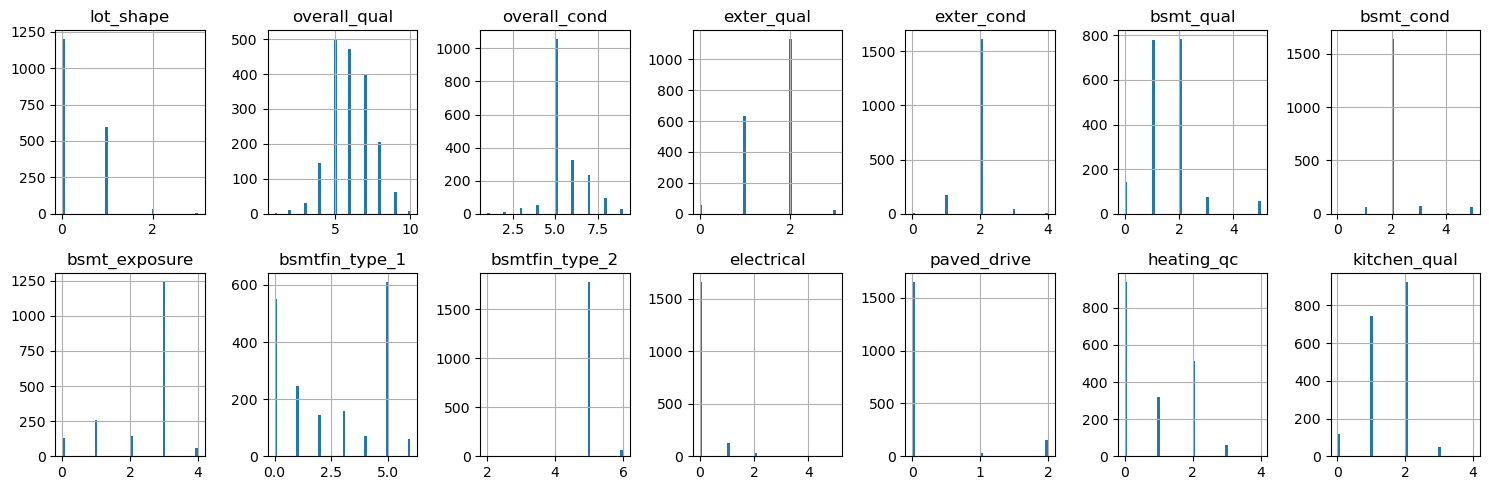

In [84]:
df[ordinal_var].hist(bins=50, figsize=(15,5), layout=(-1, 7))
plt.tight_layout()
plt.show()

#### Nominal variable

In [85]:
nominal_var = ['ms_zoning', 'land_contour', 'lot_config', 'neighborhood', 'bldg_type', 'house_style', 'roof_style', 
               'mas_vnr_type', 'foundation', 'central_air', 'garage_type', 'sale_condition', 'exterior_1st']

In [86]:
df[nominal_var].head()

ms_zoning land_contour lot_config neighborhood bldg_type house_style  \
0        RL          Lvl     Inside      Gilbert      1Fam      2Story   
1        RL          Lvl     Corner        NAmes      1Fam      1Story   
2        RM          Lvl     Inside      MeadowV     Twnhs      2Story   
3        RL          Lvl     Inside        NAmes      1Fam      1Story   
4        RM          Bnk     Inside      OldTown    2fmCon      2.5Unf   

  roof_style mas_vnr_type foundation central_air garage_type sale_condition  \
0      Gable         None      PConc           Y     BuiltIn         Normal   
1        Hip      BrkFace     CBlock           Y      Attchd         Normal   
2      Gable      BrkFace     CBlock           Y      Attchd         Normal   
3        Hip         None     CBlock           Y      Attchd         Normal   
4        Hip         None     CBlock           N      Detchd         Normal   

  exterior_1st  
0      VinylSd  
1      Wd Sdng  
2      CemntBd  
3      BrkFace  
4      Wd Sdng

In [87]:
encoded_df = pd.get_dummies(df, columns=nominal_var)
encoded_df.head()

ms_subclass  lot_frontage  lot_area  lot_shape  overall_qual  overall_cond  \
0           60          68.0      8795        1.0             7             5   
1           20          75.0     10170        0.0             6             6   
2          160          21.0      2001        0.0             4             5   
3           20          70.0     10552        1.0             5             5   
4          190          60.0     10120        1.0             7             4   

   year_built  year_remod/add  mas_vnr_area  exter_qual  exter_cond  \
0        2000            2000           0.0         1.0         2.0   
1        1951            1951         522.0         2.0         2.0   
2        1970            1970          80.0         2.0         2.0   
3        1959            1959           0.0         2.0         2.0   
4        1910            1910           0.0         3.0         2.0   

   bsmt_qual  bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_type_2  \
0        1.0        2.0            3.0             0.0             5.0   
1        2.0        2.0            3.0             5.0             5.0   
2        2.0        2.0            3.0             5.0             5.0   
3        2.0        2.0            3.0             3.0             5.0   
4        2.0        2.0            3.0             5.0             5.0   

   bsmt_unf_sf  total_bsmt_sf  heating_qc  electrical  1st_flr_sf  \
0        652.0          952.0         0.0         0.0         980   
1        216.0          216.0         2.0         0.0        1575   
2        546.0          546.0         3.0         0.0         546   
3        380.0         1398.0         1.0         0.0        1700   
4        925.0          925.0         2.0         2.0         964   

   gr_liv_area  bsmt_full_bath  full_bath  half_bath  bedroom_abvgr  \
0         2256             0.0          2          1              4   
1         1575             0.0          1          1              2   
2         1092             0.0          1          1              3   
3         1700             0.0          1          1              4   
4         1889             0.0          1          1              4   

   kitchen_abvgr  kitchen_qual  totrms_abvgrd  fireplaces  paved_drive  \
0              1           1.0              8           1          0.0   
1              1           1.0              5           1          0.0   
2              1           2.0              6           0          0.0   
3              1           1.0              6           1          0.0   
4              2           2.0              9           1          2.0   

   wood_deck_sf  open_porch_sf  mo_sold  yr_sold  saleprice_log  \
0           224             54        4     2009       5.372912   
1             0              0        6     2006       5.190332   
2             0              0        1     2007       4.875061   
3             0             38        4     2010       5.218798   
4             0              0        1     2007       5.086360   

   overall_qual_cond  garage_unified_param  ms_zoning_A (agr)  \
0                 35                9972.0                  0   
1                 36                2400.0                  0   
2                 20                 858.0                  0   
3                 25                5364.0                  0   
4                 28                 924.0                  0   

   ms_zoning_C (all)  ms_zoning_FV  ms_zoning_RH  ms_zoning_RL  ms_zoning_RM  \
0                  0             0             0             1             0   
1                  0             0             0             1             0   
2                  0             0             0             0             1   
3                  0             0             0             1             0   
4                  0             0             0             0             1   

   land_contour_Bnk  land_contour_HLS  land_contour_Low  land_contour_Lvl  \
0    

In [88]:
# Check the number of rows and columns
print("The shape of the dataframe is ",df.shape[0], "rows and " ,df.shape[1], "columns")

The shape of the dataframe is  1840 rows and  51 columns


## Splitting data

In [89]:
X = encoded_df.drop('saleprice_log', axis=1)
y = encoded_df.saleprice_log

In [90]:
# Split into train/validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.6, random_state=0)

In [91]:
print("Train DataFrame:", X_tr.shape, y_tr.shape)
print("Test DataFrame:", X_val.shape, y_val.shape)

Train DataFrame: (736, 134) (736,)
Test DataFrame: (1104, 134) (1104,)


## Model fitting

I decide to test the SelectKBest object that I found in Scikit-learn to do automatic feature selection.

In [92]:
# Feature selection using SelectKBest
k = 30  # Number of features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X_tr, y_tr)

In [93]:
# Get the scores from SelectKBest
scores = selector.scores_

# Create a DataFrame with column names and scores
columns_scores = pd.DataFrame({'Feature': X_tr.columns, 'Score': scores})

# Sort the DataFrame by scores in descending order
columns_scores = columns_scores.sort_values(by='Score', ascending=False).head(k)
columns_scores.head(15)

Feature        Score
4            overall_qual  1653.582918
36   garage_unified_param   893.057746
21            gr_liv_area   699.601134
9              exter_qual   597.824768
6              year_built   590.769288
27           kitchen_qual   567.554919
17          total_bsmt_sf   525.323968
11              bsmt_qual   520.715205
20             1st_flr_sf   449.814545
23              full_bath   425.822150
7          year_remod/add   380.506351
35      overall_qual_cond   373.117214
103      foundation_PConc   366.654031
110    garage_type_Attchd   247.134919
29             fireplaces   234.321843

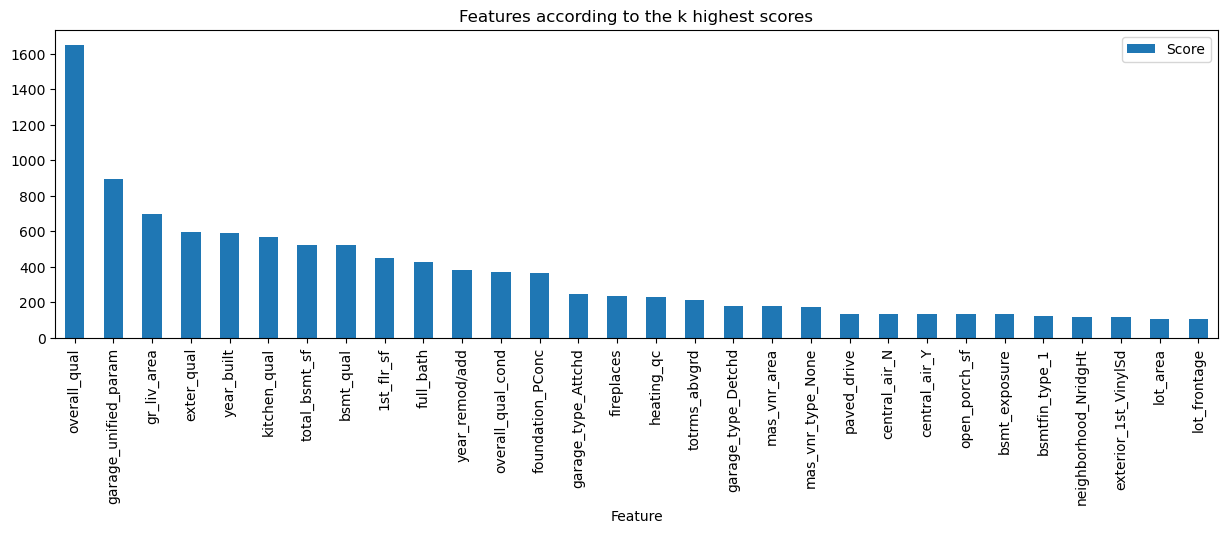

In [94]:
columns_scores.plot.bar(x='Feature', figsize=(15, 4), title="Features according to the k highest scores")
plt.show()

After analyzing the bar chart above, I have made the decision to select the two highest-scoring features, namely 'overall_qual' and 'garage_unified_param', for creating my simple model.

Regarding the intermediate model, I have chosen to include only the features that have a k score above 300. This selection results in a set of 13 features that will be used in the intermediate model.

In [95]:
simple = ['overall_qual', 'garage_unified_param']
X_tr_spl = X_tr[simple]
X_val_spl =X_val[simple]

In [96]:
# Filter the DataFrame based on the score
intermediate = columns_scores.loc[columns_scores['Score'] > 300, 'Feature'].tolist()
X_tr_interm = X_tr[intermediate]
X_val_interm =X_val[intermediate]

## Evaluation metrics

In [97]:
# Compare models with mean absolute error cost function:
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

### Baseline

In [98]:
# Create baseline
mae_baseline = MAE(10 ** y_val, np.median(10 ** y_tr))
print("MAE baseline: {:.1f}".format(mae_baseline))

MAE baseline: 50736.7


### Simple model

In [99]:
# Linear regression
lr_spl = LinearRegression()

# Fit to train data
lr_spl.fit(X_tr_spl, y_tr)

# Predictions for test data 
y_pred_lr_spl = lr_spl.predict(X_val_spl)

# Compute MAE
mae_lr_spl = MAE(10 ** y_val, 10 ** y_pred_lr_spl)
print("MAE linear regression (simple): {:.1f}".format(mae_lr_spl))

# R^2 coefficient
R2_spl =lr_spl.fit(X_tr_spl, y_tr).score(X_tr_spl, y_tr)
print("R^2 coefficient: {:.3f}".format(R2_spl))

MAE linear regression (simple): 23895.9
R^2 coefficient: 0.750


### Intermediate model

In [100]:
# Linear regression
lr_interm = LinearRegression()

# Fit to train data
lr_interm.fit(X_tr_interm, y_tr)

# Predictions for test data 
y_pred_lr_interm = lr_interm.predict(X_val_interm)

# Compute MAE
mae_lr_interm = MAE(10 ** y_val, 10 ** y_pred_lr_interm)
print("MAE linear regression (intermediate): {:.1f}".format(mae_lr_interm))

# R^2 coefficient
R2_interm = lr_interm.fit(X_tr_interm, y_tr).score(X_tr_interm, y_tr)
print("R^2 coefficient: {:.3f}".format(R2_interm))

MAE linear regression (intermediate): 16149.0
R^2 coefficient: 0.881


### Complex model

In [101]:
# Linear regression
lr_cplx = LinearRegression()

# Fit to train data
lr_cplx.fit(X_tr, y_tr)

# Predictions for test data 
y_pred_lr_cplx = lr_cplx.predict(X_val)

# Compute MAE
mae_lr_cplx = MAE(10 ** y_val, 10 ** y_pred_lr_cplx)
print("MAE linear regression (complex): {:.1f}".format(mae_lr_cplx))

# R^2 coefficient
R2_cplx = lr_cplx.fit(X_tr, y_tr).score(X_tr, y_tr)
print("R^2 coefficient: {:.3f}".format(R2_cplx))

MAE linear regression (complex): 13135.7
R^2 coefficient: 0.937


## Regularization

In [102]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_val_rescaled = scaler.transform(X_val)

In [103]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(-4, 8, num=50):
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr_rescaled, y_tr)

    # Save model and its performance on train/validation sets
    gs_results.append(
        {
            "alpha": alpha,
            "train_mse": MSE(y_tr, ridge.predict(X_tr_rescaled)),
            "train_mae": MAE(10 ** y_tr, 10 ** ridge.predict(X_tr_rescaled)),
            "validation_mse": MSE(y_val, ridge.predict(X_val_rescaled)),
            "validation_mae": MAE(10 ** y_val, 10 ** ridge.predict(X_val_rescaled)),
        }
    )

In [104]:
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

alpha  train_mse     train_mae  validation_mse  validation_mae
0  0.000100   0.001768  11350.515620        0.003359    13140.912886
1  0.000176   0.001768  11350.516094        0.003359    13140.912009
2  0.000309   0.001768  11350.516926        0.003359    13140.910467
3  0.000543   0.001768  11350.518388        0.003359    13140.907757
4  0.000954   0.001768  11350.520958        0.003359    13140.902996

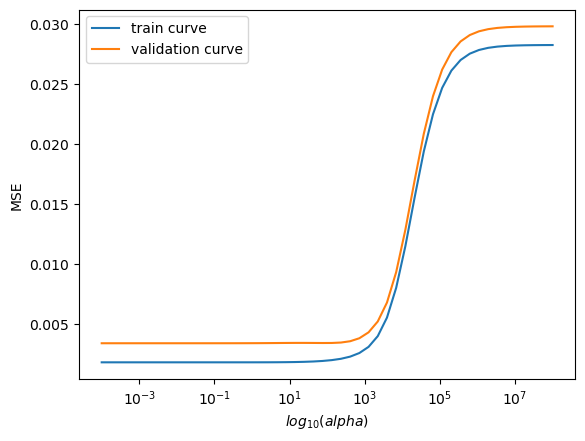

In [105]:
# Plot the validation curves
plt.semilogx(gs_results["alpha"], gs_results["train_mse"], label="train curve")
plt.semilogx(
    gs_results["alpha"], gs_results["validation_mse"], label="validation curve"
)
plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("MSE")
plt.legend()
plt.show()

## Communicating the results

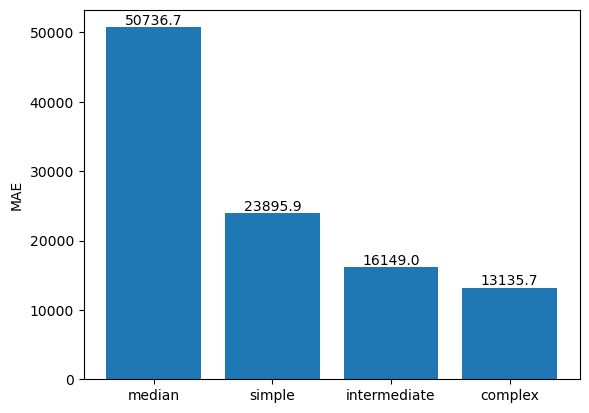

In [106]:
# Comparaison
mae_values = [mae_baseline, mae_lr_spl, mae_lr_interm, mae_lr_cplx]
titles = ["median", "simple", "intermediate", "complex"]

# Plot the bar chart
plt.bar(titles, mae_values)

# Add value labels to each bar
for i, value in enumerate(mae_values):
    plt.text(i, value, "{:.1f}".format(value), ha='center', va='bottom')

plt.ylabel("MAE")
plt.show()

- Fortunately, all three models seem to outperform the baseline. 
- The simple model, with a score of around 24k dollars, performs more than twice as well as the baseline. 
- Among the three models, the complex model achieves the highest score of 13k dollars, making it the best performer.

## Predicting on test data

In [107]:
# Load the data
df_prediction = pd.read_csv("house-prices-test.csv")

# To all column names, replace whitespace with underscores and convert to lowercase
df_prediction.columns = [col.replace(' ', '_').lower() for col in df_prediction.columns]

# Creat a new column which use both quality and condition:
df_prediction['overall_qual_cond'] = df_prediction['overall_qual'] * df_prediction['overall_cond']

scale_mapper = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'nan':0}
# Replace np.nan values by "nan" in order to have only strings
df_prediction['garage_qual'] = df_prediction.garage_qual.fillna("nan")
df_prediction["garage_qual"] = df_prediction.garage_qual.replace(scale_mapper)

scale_mapper = {'Fin':3, 'RFn':2, 'Unf':1, 'nan':0}
# Replace np.nan values by "nan" in order to have only strings
df_prediction['garage_finish'] = df_prediction.garage_finish.fillna("nan")
df_prediction["garage_finish"] = df_prediction.garage_finish.replace(scale_mapper)

# Creat a new column which use both quality and condition:
df_prediction['garage_unified_param'] = df_prediction['garage_qual'] * df_prediction['garage_finish'] * df_prediction['garage_cars'] 

columns_name = ['ms_subclass', 'ms_zoning', 'lot_area', 'lot_shape', 'land_contour','lot_config', 'neighborhood', 'bldg_type', 'house_style',
       'overall_qual', 'overall_cond', 'year_built', 'year_remod/add','roof_style', 'exterior_1st', 'mas_vnr_type', 'mas_vnr_area',
       'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond','bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'heating_qc', 'central_air', 'electrical','1st_flr_sf', 'gr_liv_area', 'bsmt_full_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd','fireplaces', 'garage_type', 'garage_area', 'paved_drive',
       'wood_deck_sf', 'open_porch_sf', 'mo_sold', 'yr_sold', 'sale_condition', 'overall_qual_cond', 'garage_unified_param']

df_prediction = df_prediction.loc[:, columns_name]

In [108]:
# Replace np.nan values by "nan" in order to have only strings
df_prediction[ordinal_var_str] = df_prediction[ordinal_var_str].fillna("nan")
df_prediction[ordinal_var_str] = df_prediction[ordinal_var_str].replace(0, "nan")

In [109]:
df_prediction[ordinal_var_str] = oe.fit_transform(df_prediction[ordinal_var_str])

In [110]:
# encoded nominal var 
encoded_df_prediction = pd.get_dummies(df_prediction, columns=nominal_var)

In [111]:
encoded_df_cols = encoded_df.columns
encoded_df_pred_cols = encoded_df_prediction.columns

# Find elements in list1 that are not in list2
elements_not_in_df_pred = list(set(encoded_df_cols) - set(encoded_df_pred_cols))
print(elements_not_in_df_pred) 

['exterior_1st_AsphShn', 'neighborhood_Landmrk', 'lot_frontage', 'neighborhood_Greens', 'exterior_1st_ImStucc', 'saleprice_log', 'foundation_Wood', 'ms_zoning_A (agr)', 'neighborhood_GrnHill', 'exterior_1st_BrkComm']


In [112]:
# Remove element 3 from the list
elements_not_in_df_pred.remove('saleprice_log')

# Add columns to the DataFrame and fill them with 0
for element in elements_not_in_df_pred:
    encoded_df_prediction[element] = float(0)

In [113]:
# Check size of encoded_df_prediction and encoded_df
print(encoded_df_prediction.shape[1])
print(encoded_df.shape[1])

136
135


In [114]:
encoded_df_prediction = encoded_df_prediction.fillna(0)

In [115]:
# Predictions with simple model
encoded_df_prediction['y_pred_lr_spl'] = 10**lr_spl.predict(encoded_df_prediction[simple])

In [116]:
# Predictions with intermediate model
encoded_df_prediction['y_pred_lr_interm'] = 10**lr_interm.predict(encoded_df_prediction[intermediate])

In [117]:
cols_cplx = X_val.columns

In [118]:
# Predictions with complex model
encoded_df_prediction['y_pred_lr_cplx'] = 10**lr_cplx.predict(encoded_df_prediction[cols_cplx])

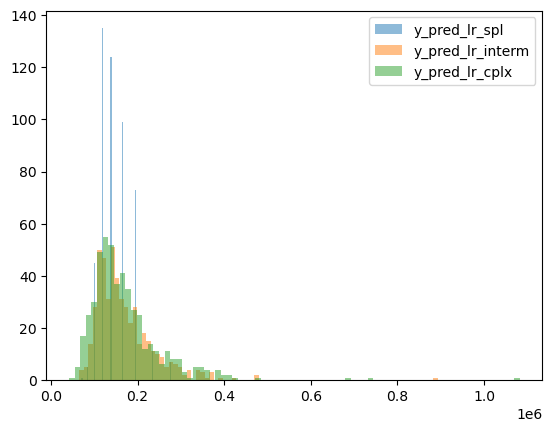

In [119]:
predictions = ['y_pred_lr_spl', 'y_pred_lr_interm', 'y_pred_lr_cplx']

for col in predictions:
    plt.hist(encoded_df_prediction[col], alpha=0.5, bins=80)
plt.legend(predictions)
plt.show()

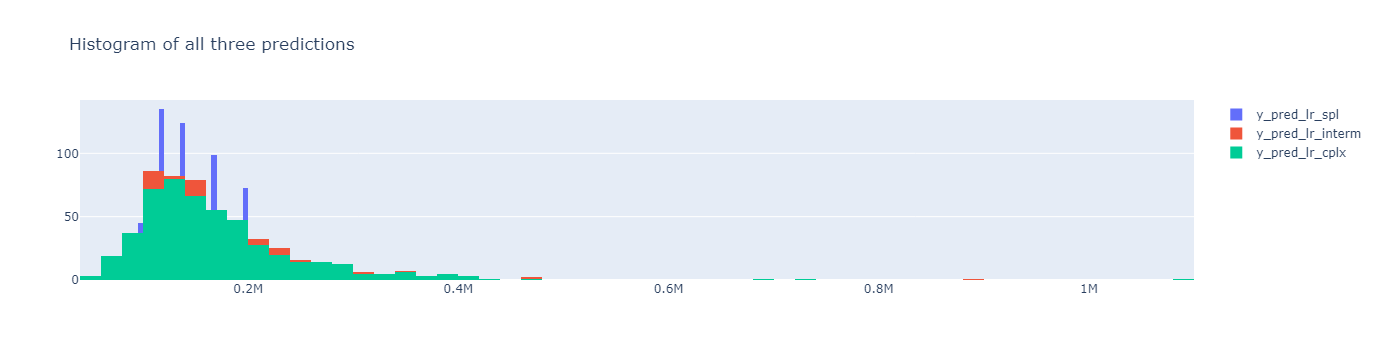

In [120]:
# Same as previous chart but with the plotly library

import plotly.graph_objects as go

predictions = ['y_pred_lr_spl', 'y_pred_lr_interm', 'y_pred_lr_cplx']

data = []
for col in predictions:
    data.append(go.Histogram(x=encoded_df_prediction[col], nbinsx=80, name=col))

layout = go.Layout(title='Histogram of all three predictions', barmode='overlay')
fig = go.Figure(data=data, layout=layout)
fig.show()

In [121]:
# prediction file for simple model : predictions-simple-model.csv
predictions_simple_model = pd.read_csv("house-prices-test.csv")
predictions_simple_model['SalePrice'] = 10**lr_spl.predict(encoded_df_prediction[simple])
predictions_simple_model = predictions_simple_model[['PID', 'SalePrice']]
predictions_simple_model.to_csv('predictions-simple-model.csv', index=False)

In [122]:
# prediction file for intermediate model : predictions-intermediate-model.csv
predictions_interm_model = pd.read_csv("house-prices-test.csv")
predictions_interm_model['SalePrice'] = 10**lr_interm.predict(encoded_df_prediction[intermediate])
predictions_interm_model = predictions_interm_model[['PID', 'SalePrice']]
predictions_interm_model.to_csv('predictions-intermediate-model.csv', index=False)

In [123]:
# prediction file for complex model : predictions-complex-model.csv
predictions_cplx_model = pd.read_csv("house-prices-test.csv")
predictions_cplx_model['SalePrice'] = 10**lr_cplx.predict(encoded_df_prediction[cols_cplx])
predictions_cplx_model = predictions_cplx_model[['PID', 'SalePrice']]
predictions_cplx_model.to_csv('predictions-complex-model.csv', index=False)

## Evaluate your predictions

Upon reviewing the results of the three predictions, it is evident that the complex model outperforms the intermediate and simple models in terms of MAEs. This observation is consistent and expected. Additionally, the RMSEs are slightly higher than the MAEs, which can be attributed to the fact that RMSE is more sensitive to outliers in the data.